#Objective:
SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.



# Data Description:
The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

- Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- Product_Weight - the weight of each product
- Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
- Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
- Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- Product_MRP - maximum retail price of each product
- Store_Id - unique identifier of each store
Store_Establishment_Year - the year in which the store was established
- Store_Size - the size of the store depending on sq. feet like high, medium, and low
- Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
- Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Superkart/SuperKart.csv')

In [ ]:
df.head(3)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16


In [ ]:
df.shape

(8763, 12)

In [ ]:
df['Product_Id'].nunique()

8763

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [ ]:
df.isnull().sum() # check for missing values

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

# Observation

- There are no missing values.



In [ ]:
df.duplicated().sum() # check for any duplicate values

0

# Observation

- There are no duplicate values

In [ ]:
df.head(3)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16


In [ ]:
df['Product_Weight'].describe() # Numeric variable check

count    8763.000000
mean       12.653792
std         2.217320
min         4.000000
25%        11.150000
50%        12.660000
75%        14.180000
max        22.000000
Name: Product_Weight, dtype: float64

In [ ]:
df['Product_Sugar_Content'].value_counts() # get count of catigorical variable values

Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64

In [ ]:
# need to change reg to Regular  because they are the same
df['Product_Sugar_Content'].replace('reg', 'Regular', inplace= True)

In [ ]:
df['Product_Sugar_Content'].value_counts()

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64

In [ ]:
df['Product_Type'].value_counts()

Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64

In [ ]:
df['Store_Id'].value_counts()

OUT004    4676
OUT001    1586
OUT003    1349
OUT002    1152
Name: Store_Id, dtype: int64

In [ ]:
df['Store_Type'].value_counts()

Supermarket Type2     4676
Supermarket Type1     1586
Departmental Store    1349
Food Mart             1152
Name: Store_Type, dtype: int64

In [ ]:
df['Store_Size'].value_counts()

Medium    6025
High      1586
Small     1152
Name: Store_Size, dtype: int64

In [ ]:
df['Store_Location_City_Type'].value_counts()

Tier 2    6262
Tier 1    1349
Tier 3    1152
Name: Store_Location_City_Type, dtype: int64

In [ ]:
df['Product_Id']= df['Product_Id'].str[:2]

In [ ]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
import seaborn as sns

<Axes: xlabel='Product_Weight'>

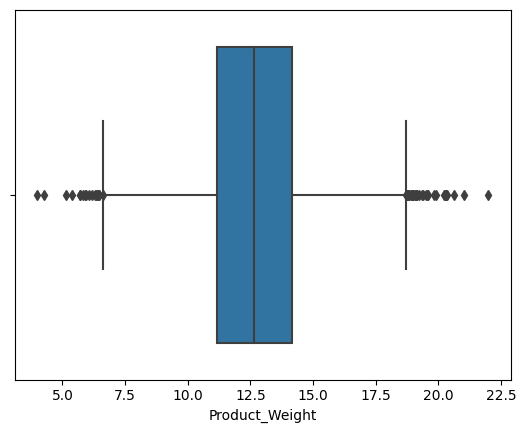

In [ ]:
# look at the dustribution of the product weight
sns.boxplot(data= df, x= 'Product_Weight')

<Axes: xlabel='Product_Weight', ylabel='Count'>

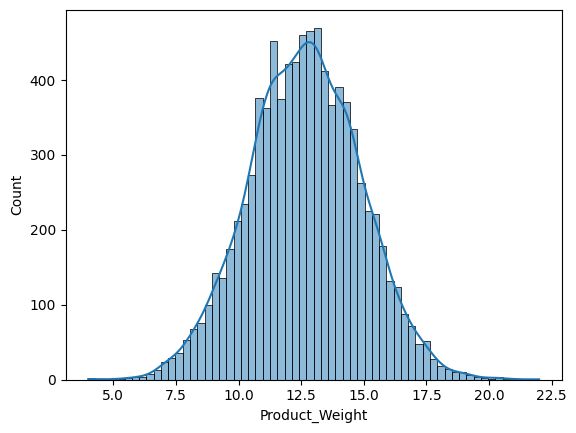

In [ ]:
# look at the histogram of the plot
sns.histplot(data= df, x= 'Product_Weight', kde= True)

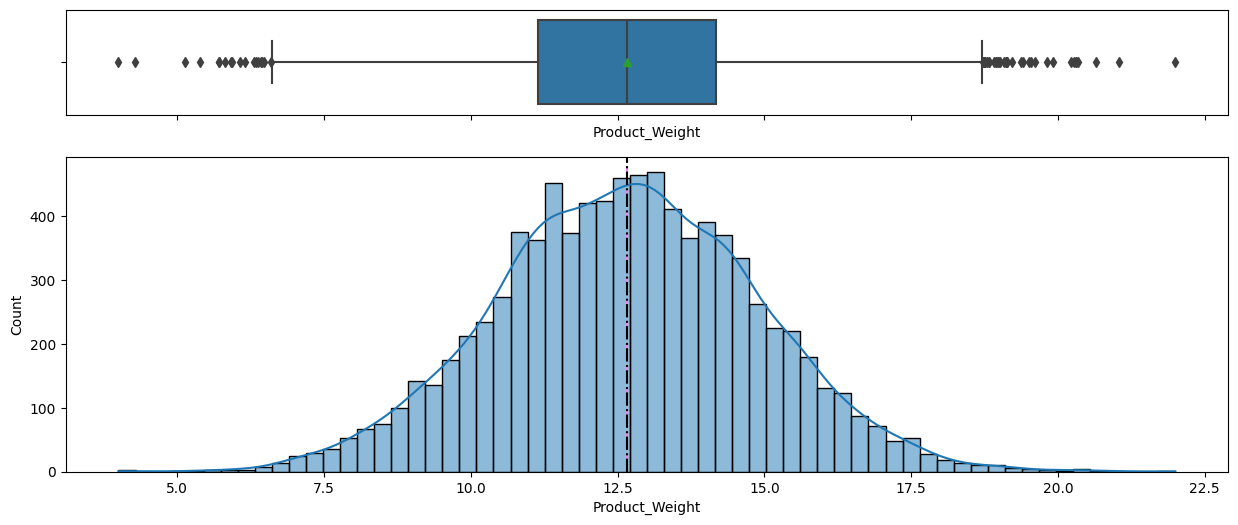

In [ ]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(2,1, figsize= (15,6), gridspec_kw= {'height_ratios': (1,3)}, sharex= True)
sns.boxplot(data= df, x= 'Product_Weight', showmeans= True, ax= ax[0])
sns.histplot(data= df, x= 'Product_Weight', kde= True, ax= ax [1])
ax[1].axvline(df['Product_Weight'].mean(), linestyle= "--", color= 'violet')
ax[1].axvline(df['Product_Weight'].mean(), linestyle= "-.", color= 'black')

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

In [ ]:
df.head(1)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.4


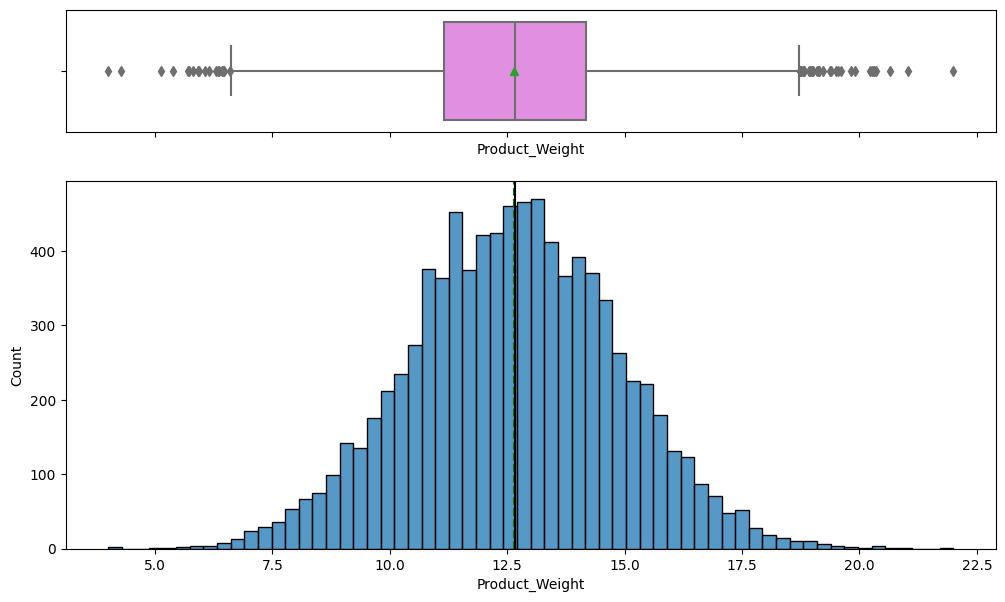

In [ ]:
histogram_boxplot(df, 'Product_Weight')

# Observation:

- The product weight is uniformly distributed with mean and median lying around 12.5.

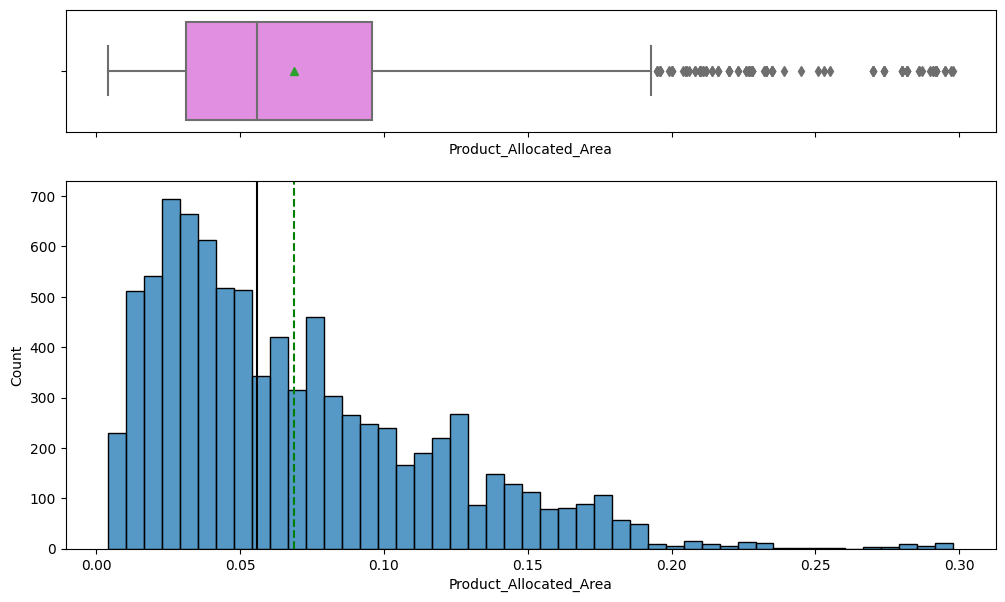

In [ ]:
histogram_boxplot(df, 'Product_Allocated_Area')

# Observation:

- The distribution is right skewed with the median lying around 0.05.

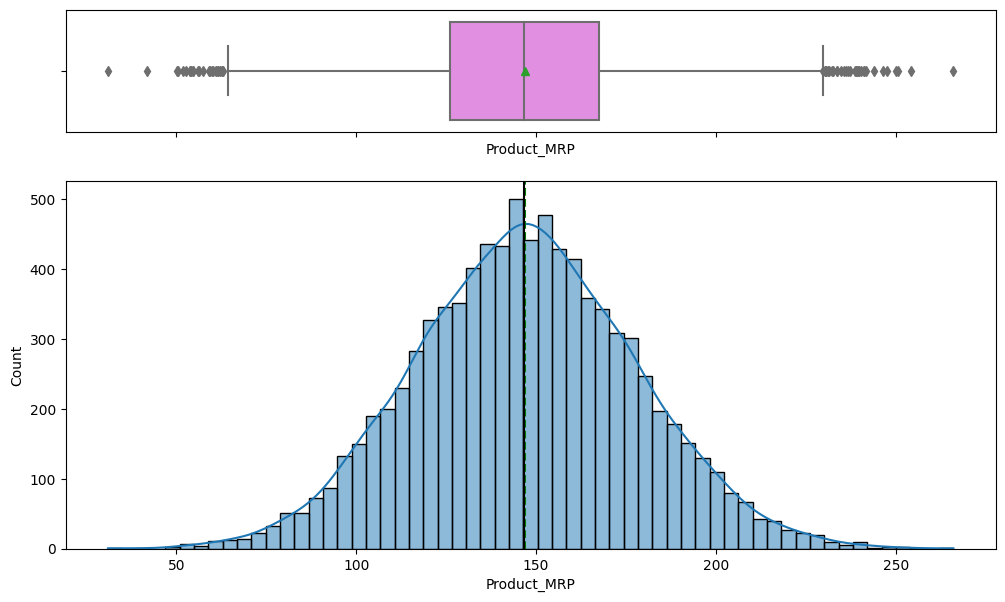

In [ ]:
histogram_boxplot(df, 'Product_MRP', kde= True)

# Observation:

- The product MRP is uniformly distributed with mean and median lying around 150.

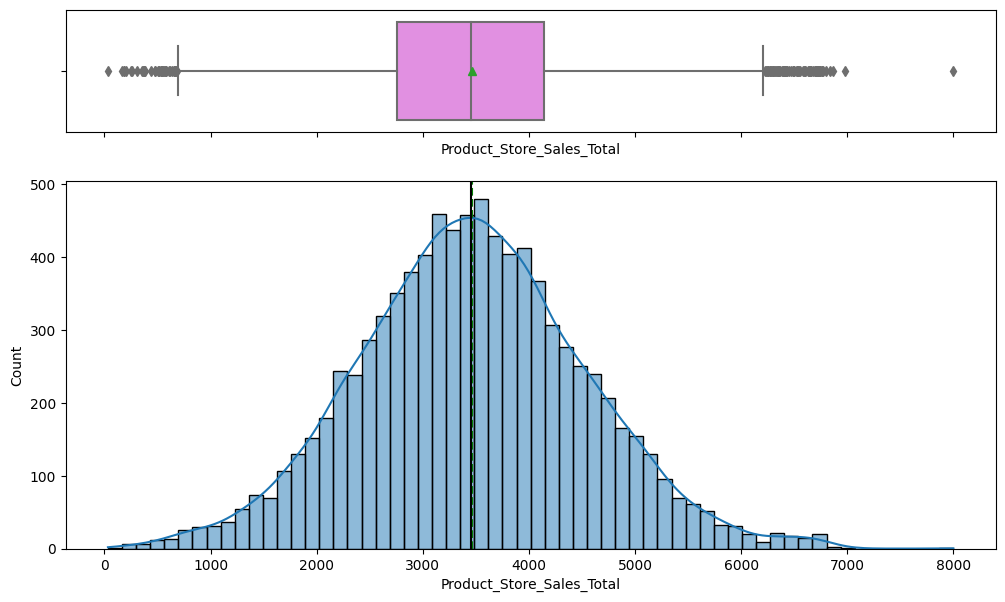

In [ ]:
histogram_boxplot(df, 'Product_Store_Sales_Total', kde= True)

# Observation:

- The revenue generated from each product at a particular store is normally distributed with mean and median lying around 3500.

In [ ]:
df.head(1)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.4


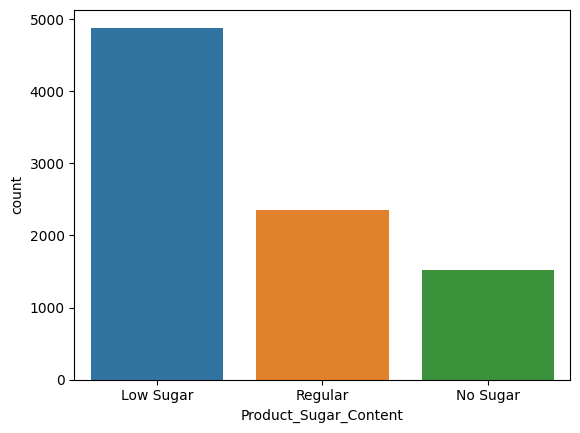

In [ ]:
ax= sns.countplot(data= df, x= 'Product_Sugar_Content')

# Observation
- Low sugar is the most common

In [ ]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot

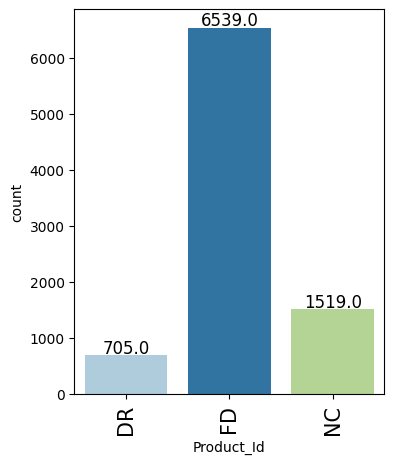

In [ ]:
labeled_barplot(df, 'Product_Id')

# Observation
- Most common product is food or FD

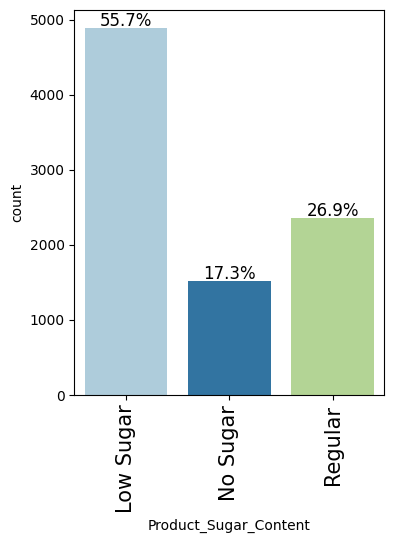

In [ ]:
labeled_barplot(df, 'Product_Sugar_Content', perc= True)

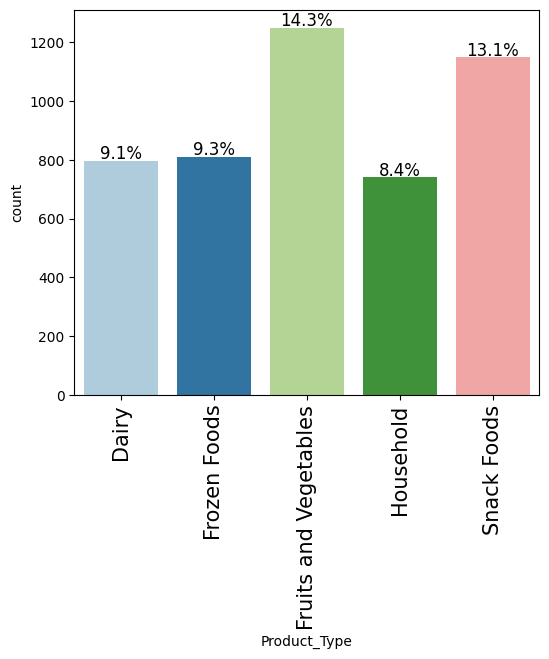

In [ ]:
labeled_barplot(df, 'Product_Type', n= 5,perc= True)

# Observation
- The top 5 products are:
  - Fruits and vegetables
  - Snack foods
  - Frozen Foods
  - Dairy
  - House hold
- Fruits and vegies is at the topo with 14.3%

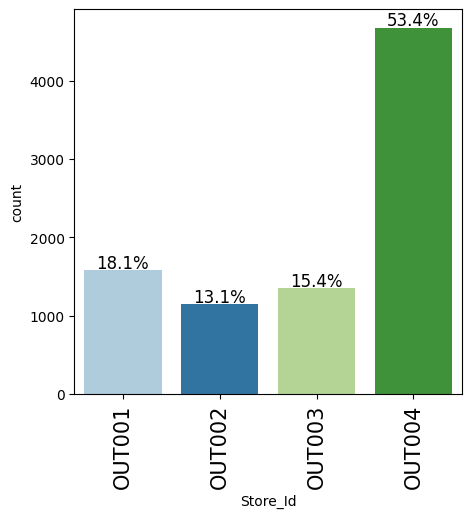

In [ ]:
labeled_barplot(df, 'Store_Id', perc= True)

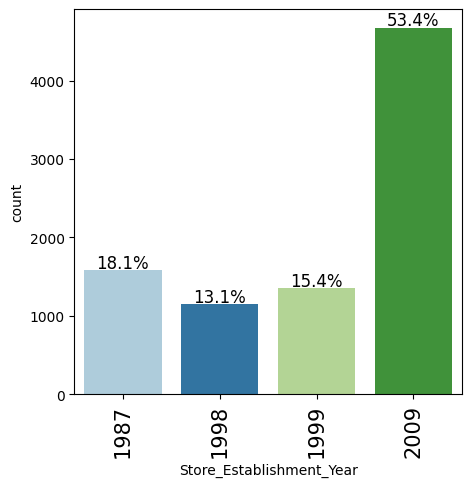

In [ ]:
labeled_barplot(df, 'Store_Establishment_Year', perc= True)

# Observation
- most of the stores were established in 2009
- 1987 seem to be the year they went into business
- 2009 was the year of the most growth and expension (What happened in 09 that made them expand so rapidly)

In [ ]:
df.head(1
        )

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.4


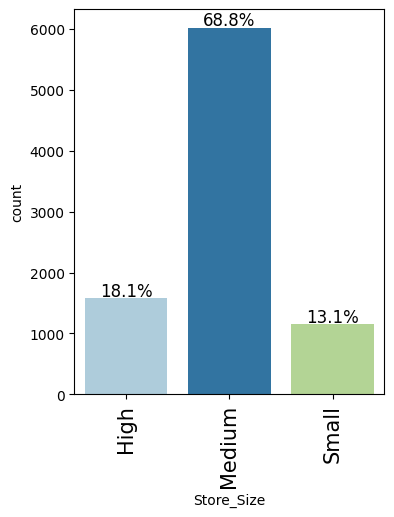

In [ ]:
labeled_barplot(df, 'Store_Size', perc= True)

# Observation
- Most stores are medum sized (Why?)

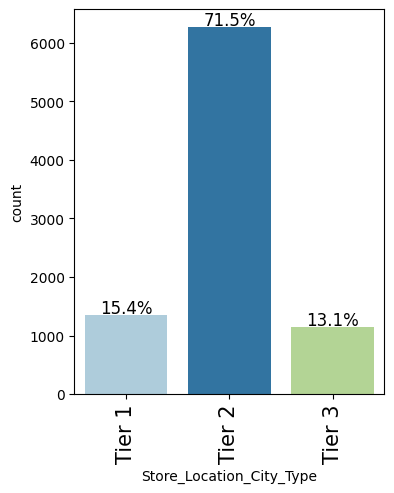

In [ ]:
labeled_barplot(df, 'Store_Location_City_Type', perc= True)

# Observation
- Most stores are tier 2 stores (Why?)

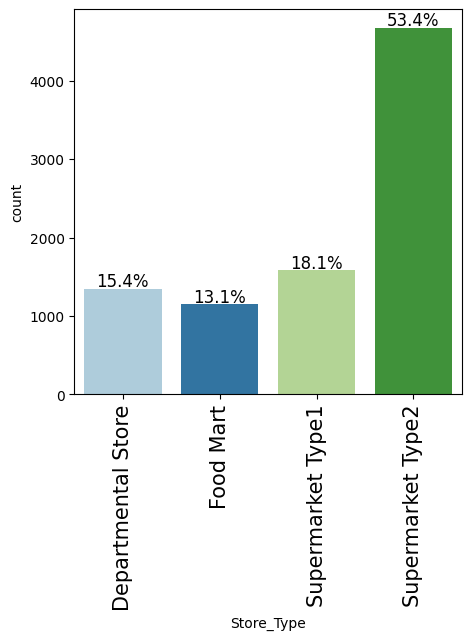

In [ ]:
labeled_barplot(df, 'Store_Type', perc= True)

# Observations
- Most stores aere supermarket type 2

<ipython-input-44-6cb7a68c80f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, fmt= '.2f', cmap= 'viridis')


<Axes: >

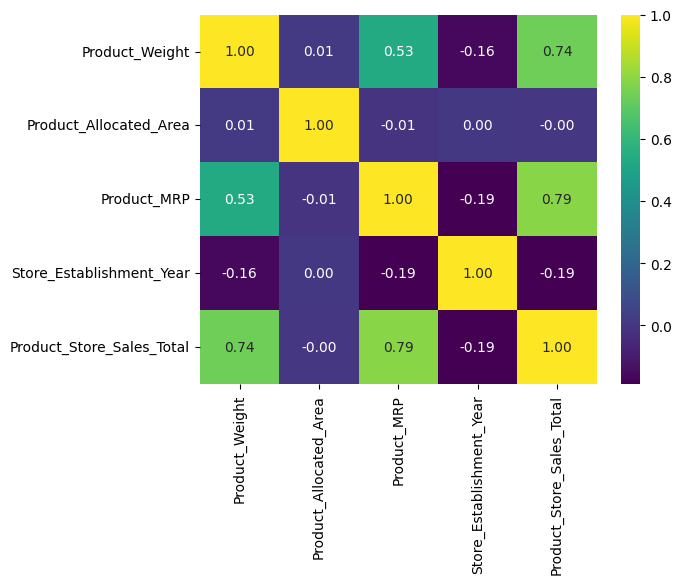

In [ ]:
sns.heatmap(df.corr(), annot= True, fmt= '.2f', cmap= 'viridis')

# Observations
- Product weight and product MRP are highly correlated with product store sales totals
- Product weight and product MRP have a strong correlation as well
- Everthing else has no correlation

In [ ]:
df_rev= df.groupby(['Product_Id'], as_index= False)['Product_Store_Sales_Total'].sum()

<Axes: xlabel='Product_Id', ylabel='Product_Store_Sales_Total'>

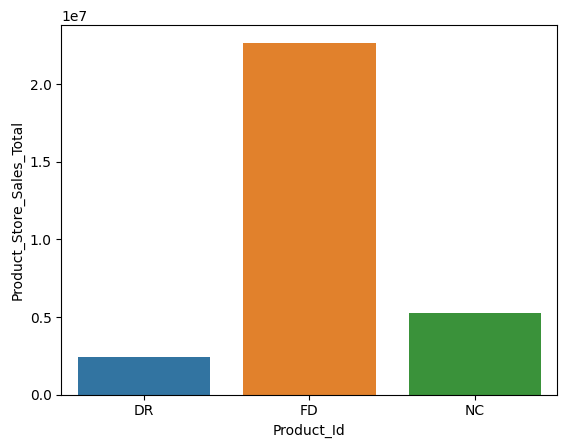

In [ ]:
sns.barplot(df_rev, x= 'Product_Id', y= 'Product_Store_Sales_Total')

<ipython-input-47-9c1ead37fc3f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1)` for the same effect.

  sns.barplot(data= df, x= 'Product_Id', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1)


<Axes: xlabel='Product_Id', ylabel='Product_Store_Sales_Total'>

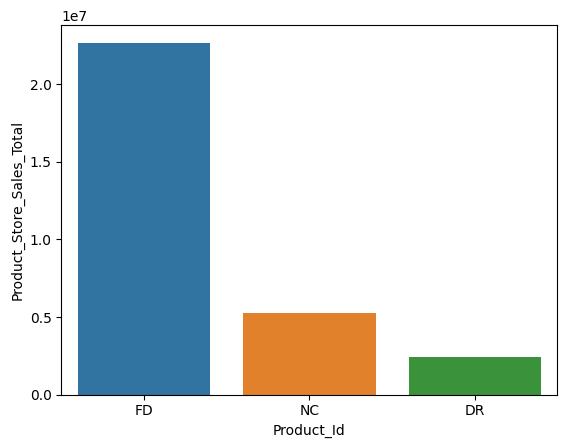

In [ ]:
import numpy as np
sns.barplot(data= df, x= 'Product_Id', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1)

<ipython-input-48-387176bf6980>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df, x= 'Product_Sugar_Content', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)


<Axes: xlabel='Product_Sugar_Content', ylabel='Product_Store_Sales_Total'>

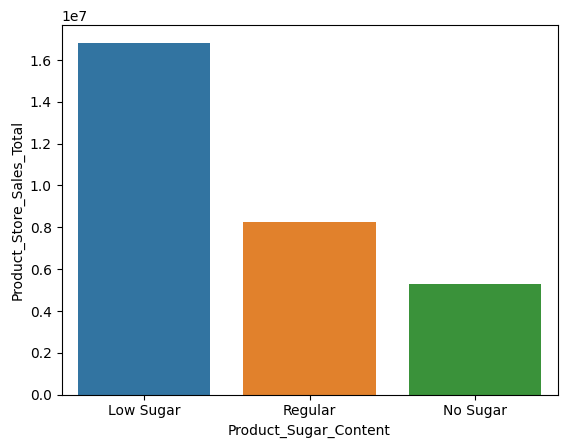

In [ ]:
sns.barplot(data= df, x= 'Product_Sugar_Content', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)

<ipython-input-49-fc09f501339b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df, x= 'Product_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Canned'),
  Text(3, 0, 'Baking Goods'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Meat'),
  Text(7, 0, 'Household'),
  Text(8, 0, 'Hard Drinks'),
  Text(9, 0, 'Fruits and Vegetables'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Breakfast'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

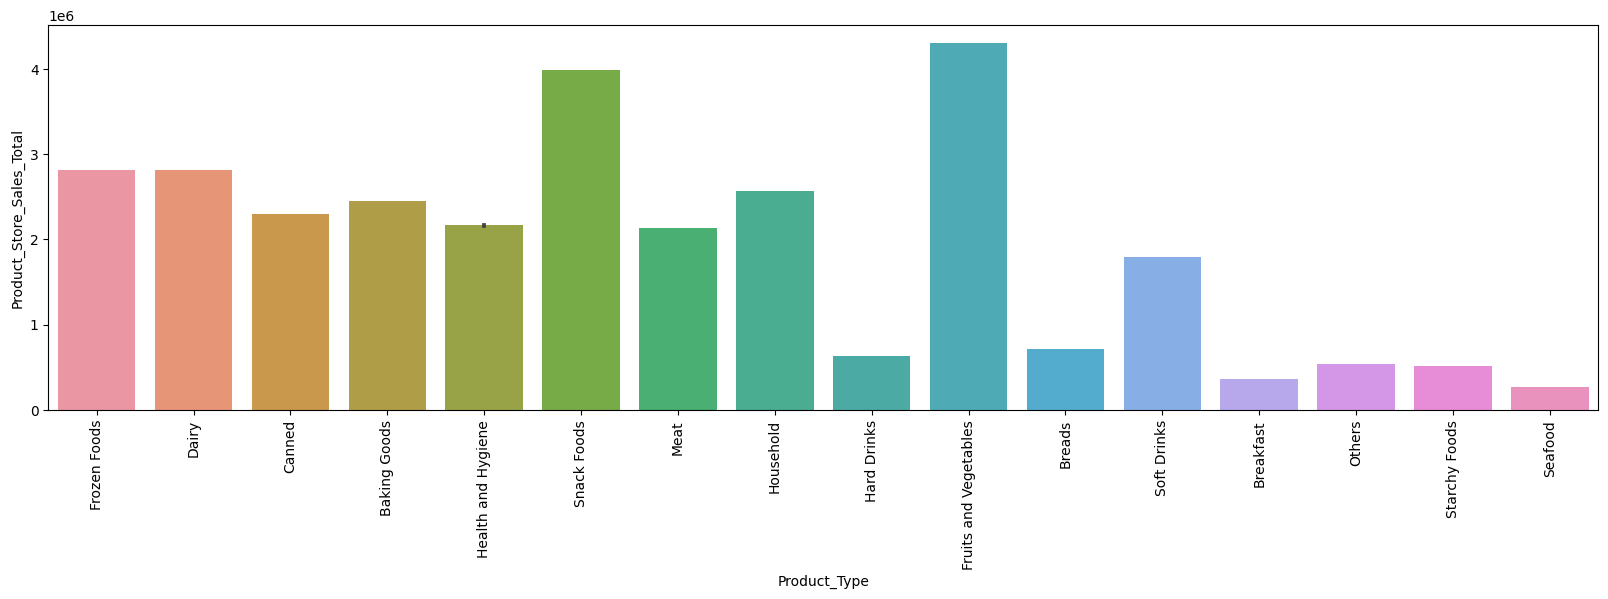

In [ ]:
plt.figure(figsize= (20,5))
sns.barplot(data= df, x= 'Product_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 90)

<ipython-input-50-a345a9bcc8ca>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df, x= 'Store_Id', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'OUT004'),
  Text(1, 0, 'OUT003'),
  Text(2, 0, 'OUT001'),
  Text(3, 0, 'OUT002')])

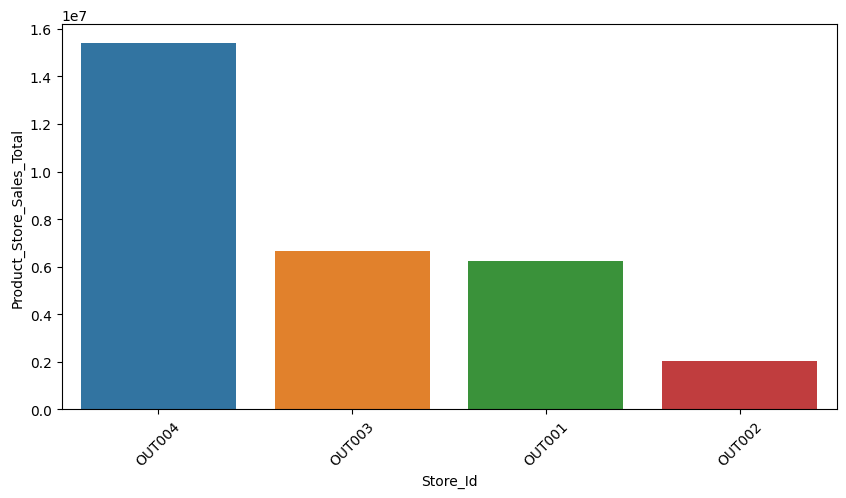

In [ ]:
plt.figure(figsize= (10,5))
sns.barplot(data= df, x= 'Store_Id', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-51-f427a20b7288>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df, x= 'Store_Establishment_Year', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)


(array([0, 1, 2, 3]),
 [Text(0, 0, '1987'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2009')])

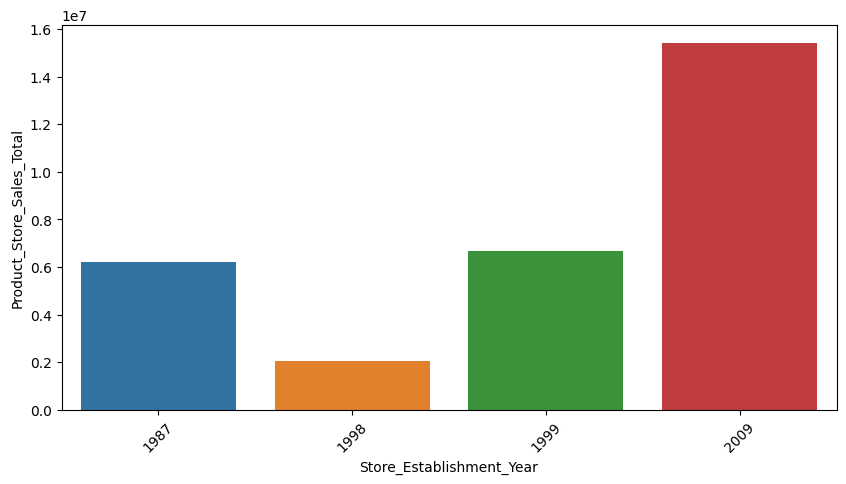

In [ ]:
plt.figure(figsize= (10,5))
sns.barplot(data= df, x= 'Store_Establishment_Year', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-52-95060bc9db64>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df, x= 'Store_Size', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)


(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

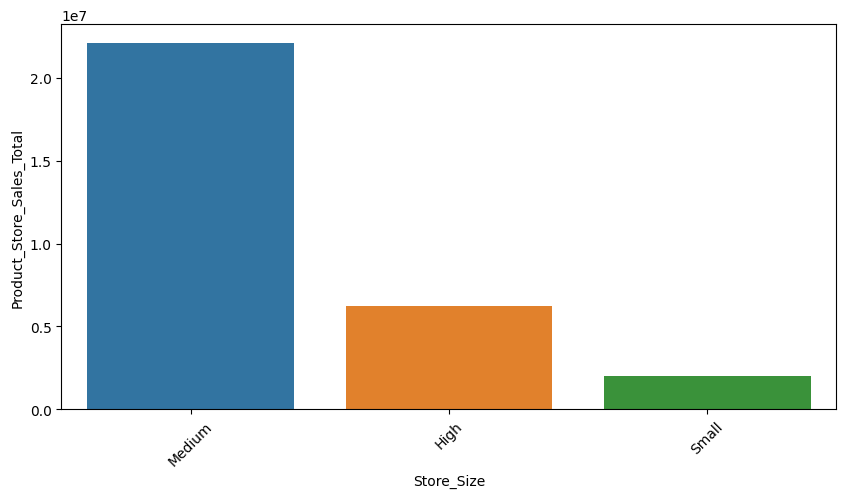

In [ ]:
plt.figure(figsize= (10,5))
sns.barplot(data= df, x= 'Store_Size', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-53-a5ee4dfdaca9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df, x= 'Store_Location_City_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)


(array([0, 1, 2]),
 [Text(0, 0, 'Tier 2'), Text(1, 0, 'Tier 1'), Text(2, 0, 'Tier 3')])

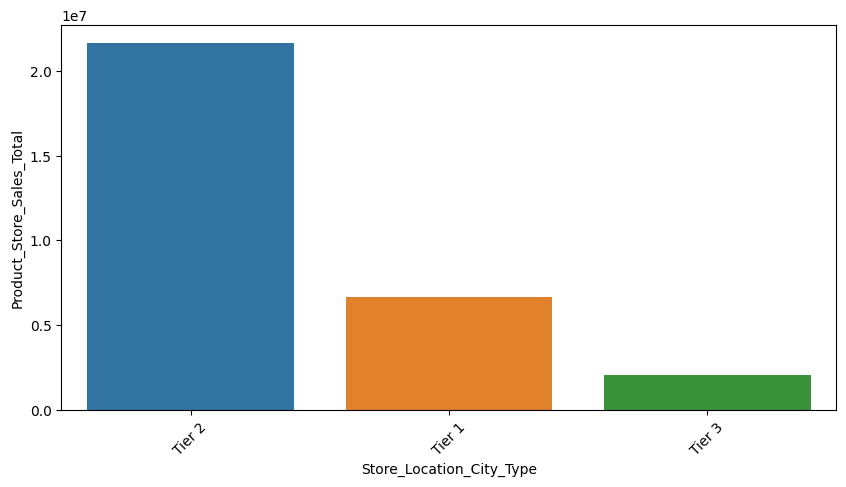

In [ ]:
plt.figure(figsize= (10,5))
sns.barplot(data= df, x= 'Store_Location_City_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-54-88cff686abda>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df, x= 'Store_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type2'),
  Text(1, 0, 'Departmental Store'),
  Text(2, 0, 'Supermarket Type1'),
  Text(3, 0, 'Food Mart')])

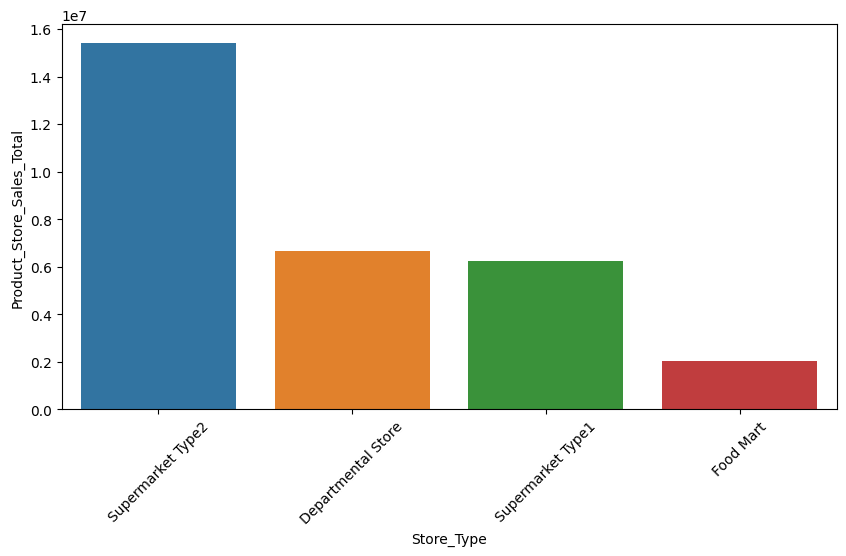

In [ ]:
plt.figure(figsize= (10,5))
sns.barplot(data= df, x= 'Store_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

# Observation
Here are the the things that generate the most revenue:
- Food items
- Laow sugar items
- Fruits and Vegetables and Snack foods
- Store id OUT004
- The year 2009 (This is th eyear they had the most expansion)
- Medium sized stores
- Tier 2 stores
- Supermarket type 2

<Axes: xlabel='Product_Sugar_Content', ylabel='Product_Store_Sales_Total'>

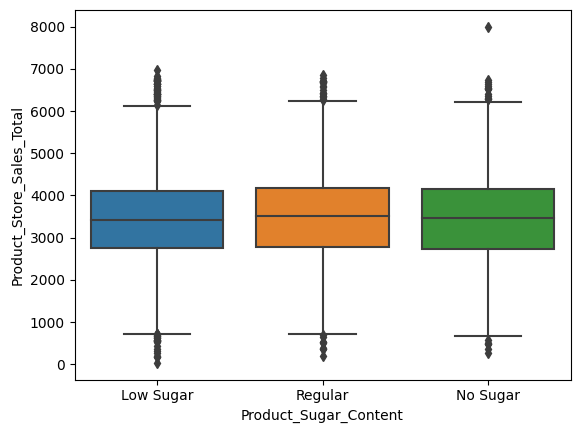

In [ ]:
sns.boxplot(data= df, x= 'Product_Sugar_Content', y= 'Product_Store_Sales_Total')

# Observation
Prices form sugar content is roughly the same

<Axes: xlabel='Store_Size', ylabel='Product_Store_Sales_Total'>

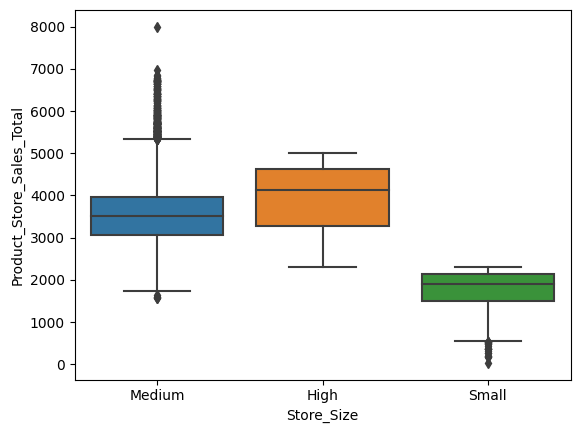

In [ ]:
sns.boxplot(data= df, x= 'Store_Size', y= 'Product_Store_Sales_Total')

# Observation
High size store prices look to be higher. Although medium size generated more revenue

<Axes: xlabel='Store_Id', ylabel='Product_Store_Sales_Total'>

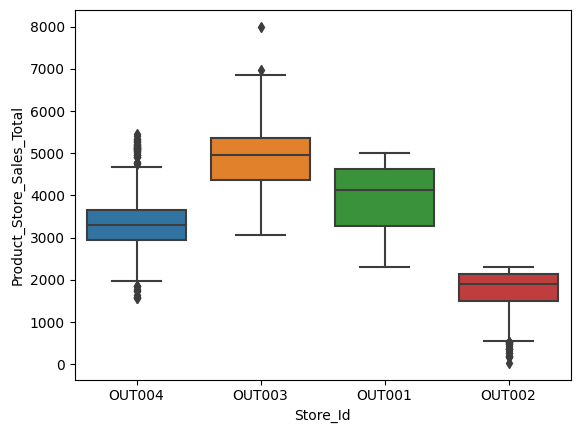

In [ ]:
sns.boxplot(data= df, x= 'Store_Id', y= 'Product_Store_Sales_Total')

# Observation
OUT003 prices are higher. OUT004 generates more revenue.


<Axes: xlabel='Store_Type', ylabel='Product_Store_Sales_Total'>

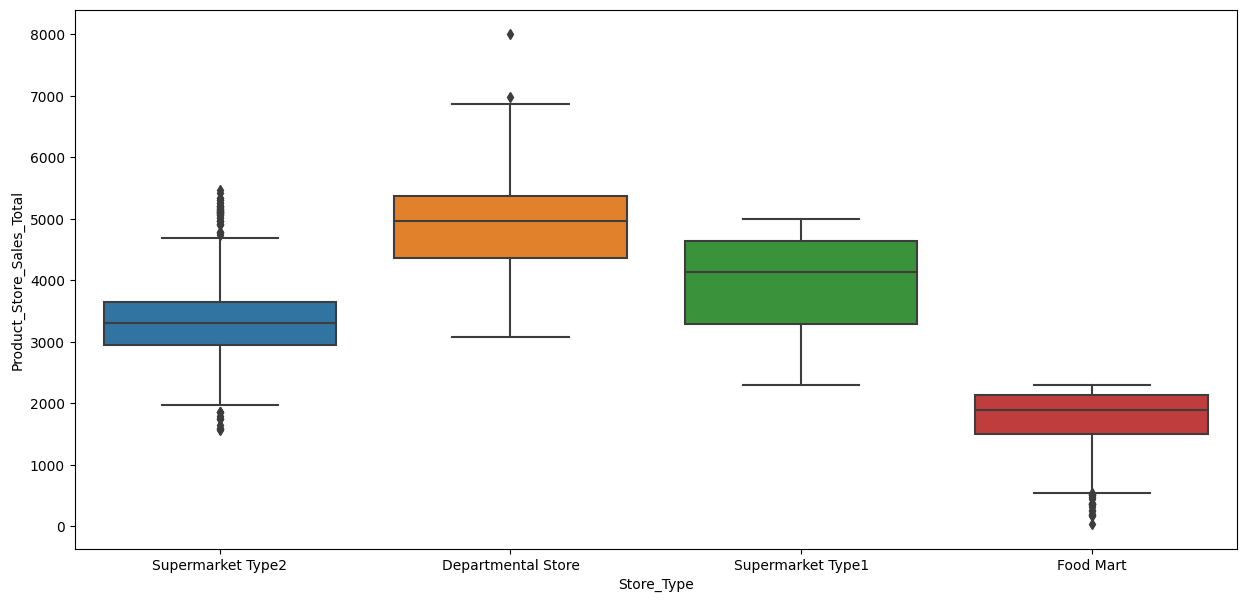

In [ ]:
plt.figure(figsize= (15, 7))
sns.boxplot(data= df, x= 'Store_Type', y= 'Product_Store_Sales_Total')

# Observation
Looks like department stores have higher mediam prices
Supermarket type 2 generates the most revenue.
Department stores mayhave more higher ticket items

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Canned'),
  Text(3, 0, 'Baking Goods'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Meat'),
  Text(7, 0, 'Household'),
  Text(8, 0, 'Hard Drinks'),
  Text(9, 0, 'Fruits and Vegetables'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Breakfast'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

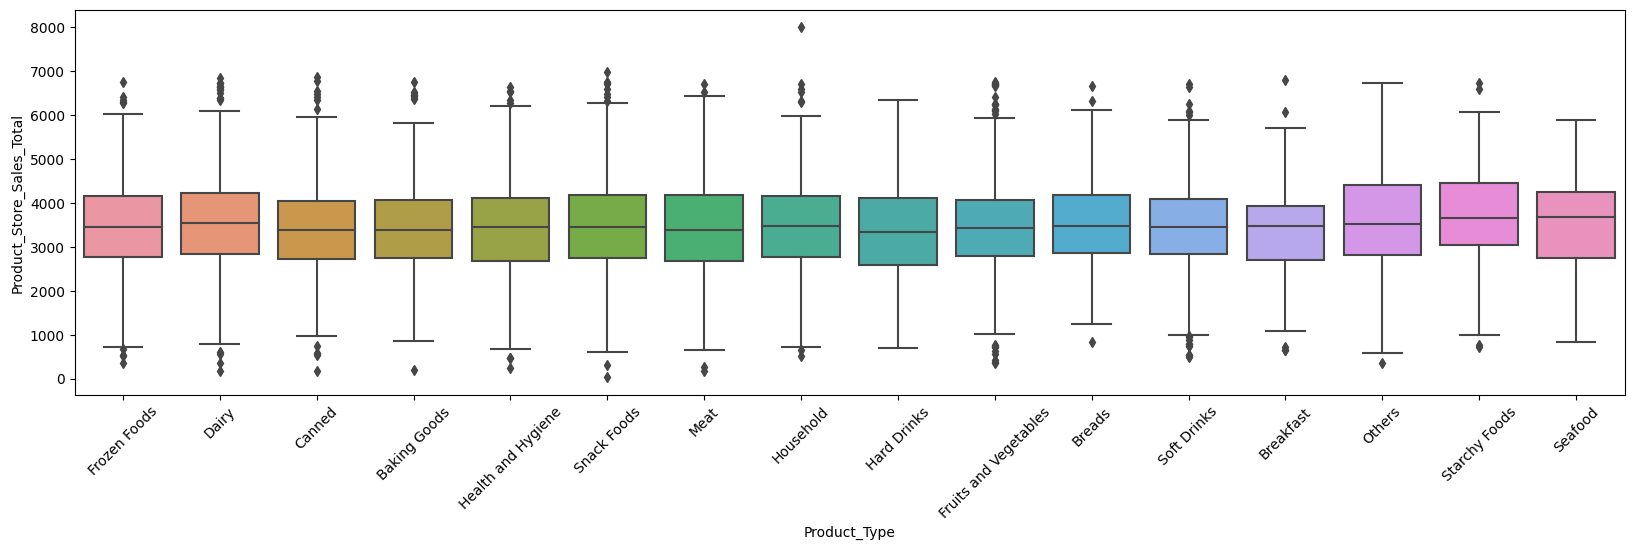

In [ ]:
plt.figure(figsize= (20, 5))
sns.boxplot(data= df, x= 'Product_Type', y= 'Product_Store_Sales_Total')
plt.xticks(rotation= 45)

# Observation
Median prices look to be the same for all product types, which is interesting

In [ ]:
df.groupby('Store_Id')['Product_Store_Sales_Total'].sum()

Store_Id
OUT001     6223113.18
OUT002     2030909.72
OUT003     6673457.57
OUT004    15427583.43
Name: Product_Store_Sales_Total, dtype: float64

<ipython-input-61-0cbd16334272>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Id']== 'OUT001'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Canned'),
  Text(1, 0, 'Baking Goods'),
  Text(2, 0, 'Snack Foods'),
  Text(3, 0, 'Soft Drinks'),
  Text(4, 0, 'Meat'),
  Text(5, 0, 'Breakfast'),
  Text(6, 0, 'Frozen Foods'),
  Text(7, 0, 'Fruits and Vegetables'),
  Text(8, 0, 'Dairy'),
  Text(9, 0, 'Hard Drinks'),
  Text(10, 0, 'Starchy Foods'),
  Text(11, 0, 'Health and Hygiene'),
  Text(12, 0, 'Household'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Seafood'),
  Text(15, 0, 'Breads')])

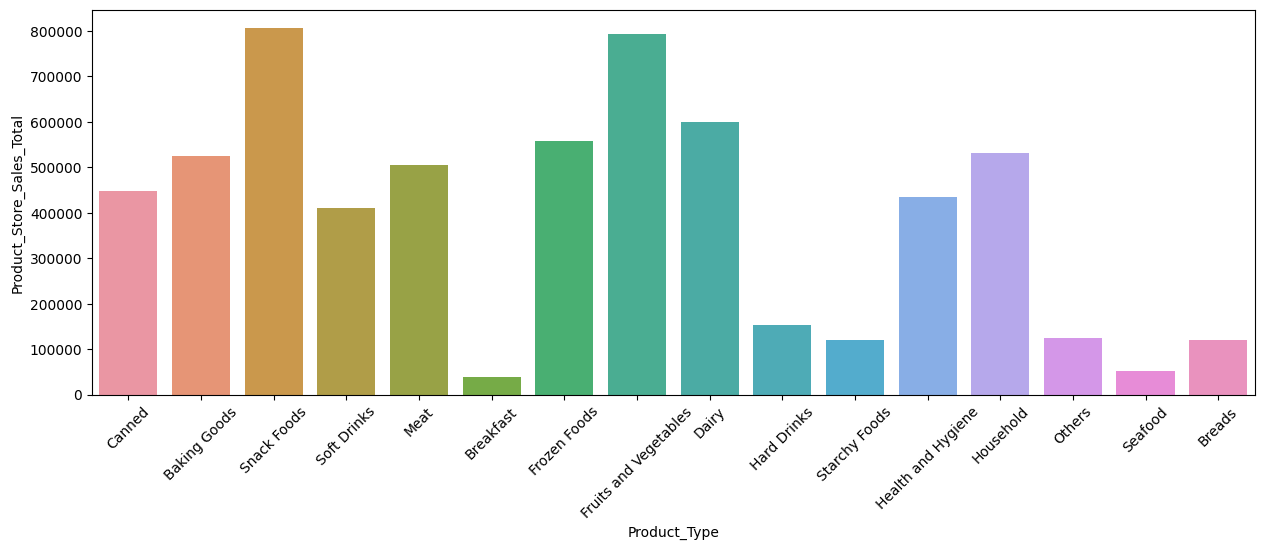

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Id']== 'OUT001'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-62-5a09bb0d05b6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Id']== 'OUT002'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Health and Hygiene'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Meat'),
  Text(4, 0, 'Hard Drinks'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Starchy Foods'),
  Text(7, 0, 'Dairy'),
  Text(8, 0, 'Fruits and Vegetables'),
  Text(9, 0, 'Frozen Foods'),
  Text(10, 0, 'Seafood'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Baking Goods'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Breakfast')])

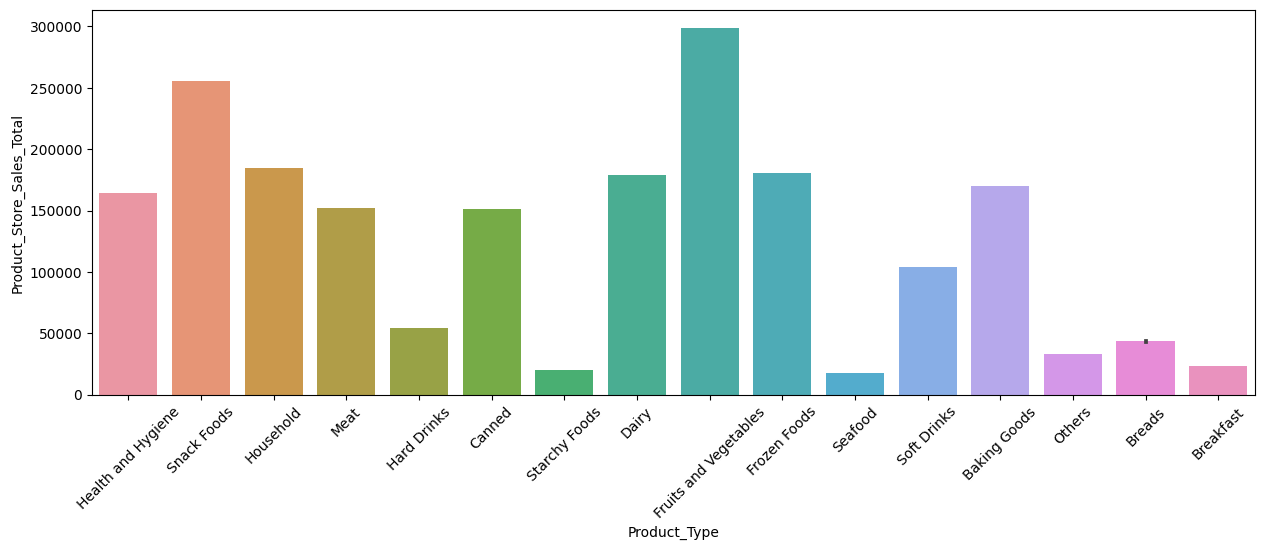

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Id']== 'OUT002'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-63-21e3e8f59c70>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Id']== 'OUT003'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Meat'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Canned'),
  Text(7, 0, 'Soft Drinks'),
  Text(8, 0, 'Baking Goods'),
  Text(9, 0, 'Starchy Foods'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'Breakfast'),
  Text(12, 0, 'Frozen Foods'),
  Text(13, 0, 'Seafood'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Hard Drinks')])

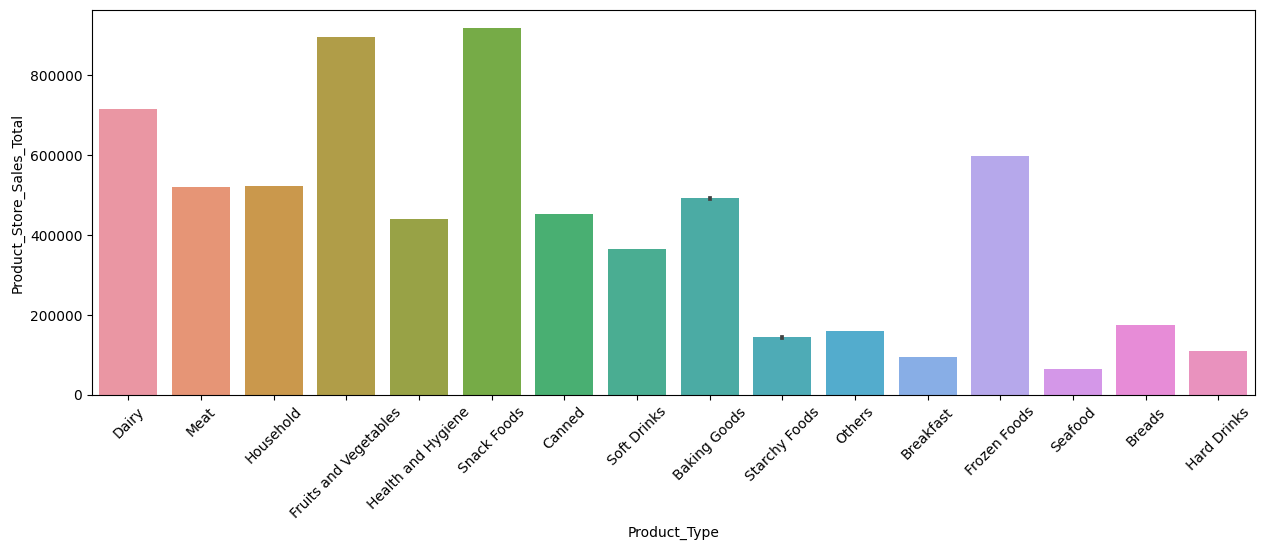

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Id']== 'OUT003'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-64-fe30f580f9e9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Id']== 'OUT004'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Health and Hygiene'),
  Text(3, 0, 'Hard Drinks'),
  Text(4, 0, 'Fruits and Vegetables'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Breads'),
  Text(8, 0, 'Household'),
  Text(9, 0, 'Dairy'),
  Text(10, 0, 'Breakfast'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Others'),
  Text(13, 0, 'Meat'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

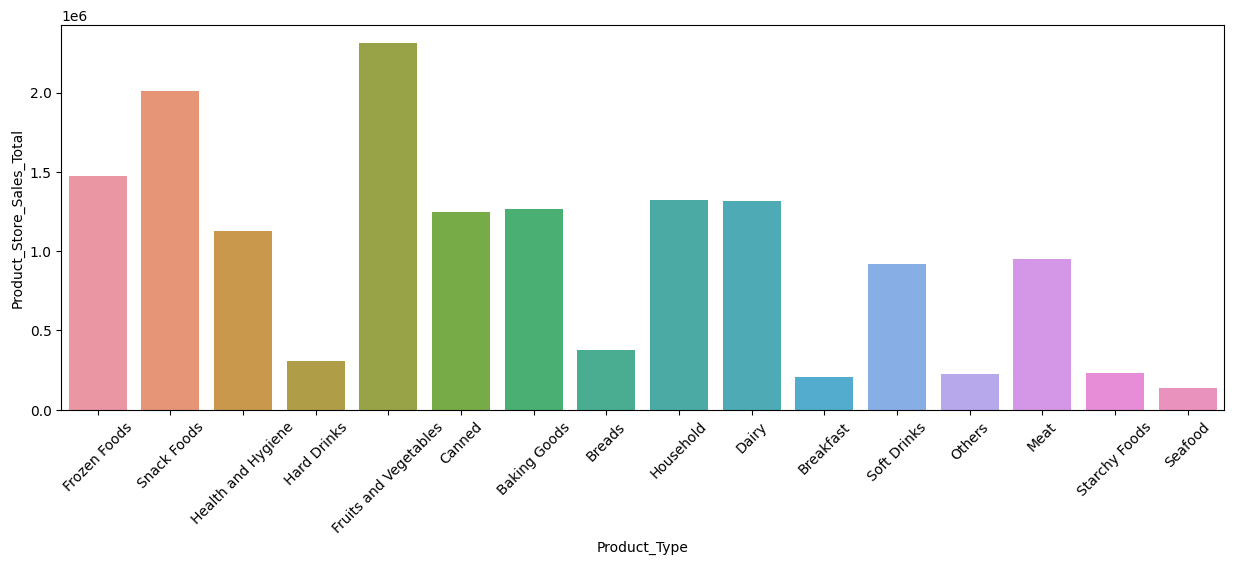

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Id']== 'OUT004'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

In [ ]:
df.groupby('Store_Size')['Product_Store_Sales_Total'].sum()

Store_Size
High       6223113.18
Medium    22101041.00
Small      2030909.72
Name: Product_Store_Sales_Total, dtype: float64

<ipython-input-66-aa49e2548466>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Size']== 'High'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Canned'),
  Text(1, 0, 'Baking Goods'),
  Text(2, 0, 'Snack Foods'),
  Text(3, 0, 'Soft Drinks'),
  Text(4, 0, 'Meat'),
  Text(5, 0, 'Breakfast'),
  Text(6, 0, 'Frozen Foods'),
  Text(7, 0, 'Fruits and Vegetables'),
  Text(8, 0, 'Dairy'),
  Text(9, 0, 'Hard Drinks'),
  Text(10, 0, 'Starchy Foods'),
  Text(11, 0, 'Health and Hygiene'),
  Text(12, 0, 'Household'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Seafood'),
  Text(15, 0, 'Breads')])

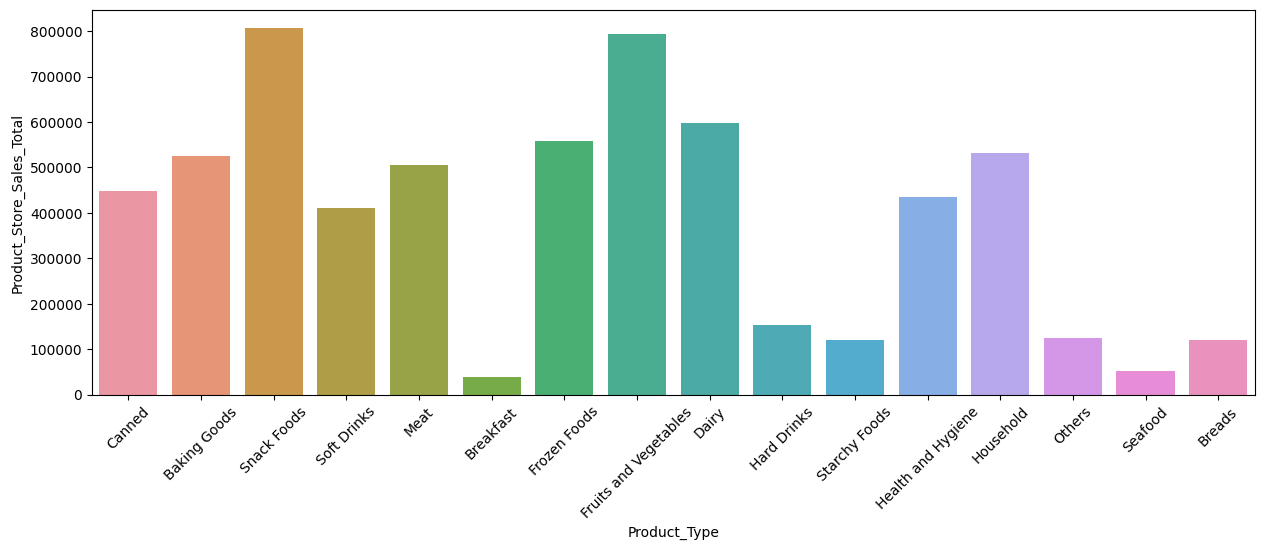

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Size']== 'High'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-67-7a57976b914a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Size']== 'Medium'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Snack Foods'),
  Text(3, 0, 'Meat'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Health and Hygiene'),
  Text(6, 0, 'Hard Drinks'),
  Text(7, 0, 'Fruits and Vegetables'),
  Text(8, 0, 'Canned'),
  Text(9, 0, 'Baking Goods'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Breakfast'),
  Text(12, 0, 'Soft Drinks'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

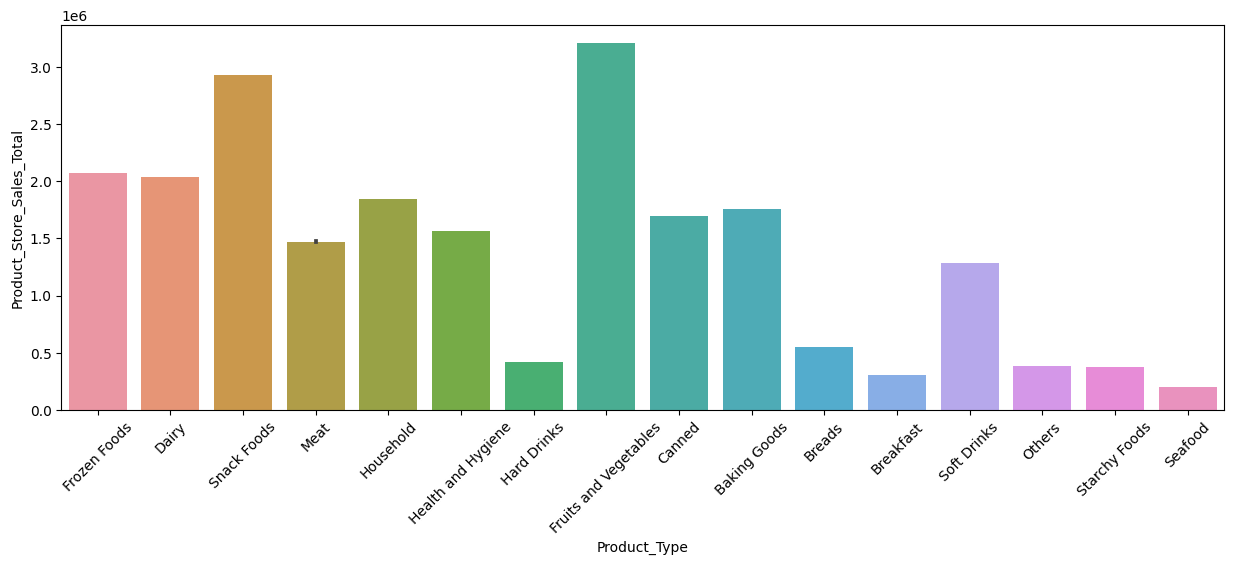

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Size']== 'Medium'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-68-e53015ccb75a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Size']== 'Small'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Health and Hygiene'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Meat'),
  Text(4, 0, 'Hard Drinks'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Starchy Foods'),
  Text(7, 0, 'Dairy'),
  Text(8, 0, 'Fruits and Vegetables'),
  Text(9, 0, 'Frozen Foods'),
  Text(10, 0, 'Seafood'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Baking Goods'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Breakfast')])

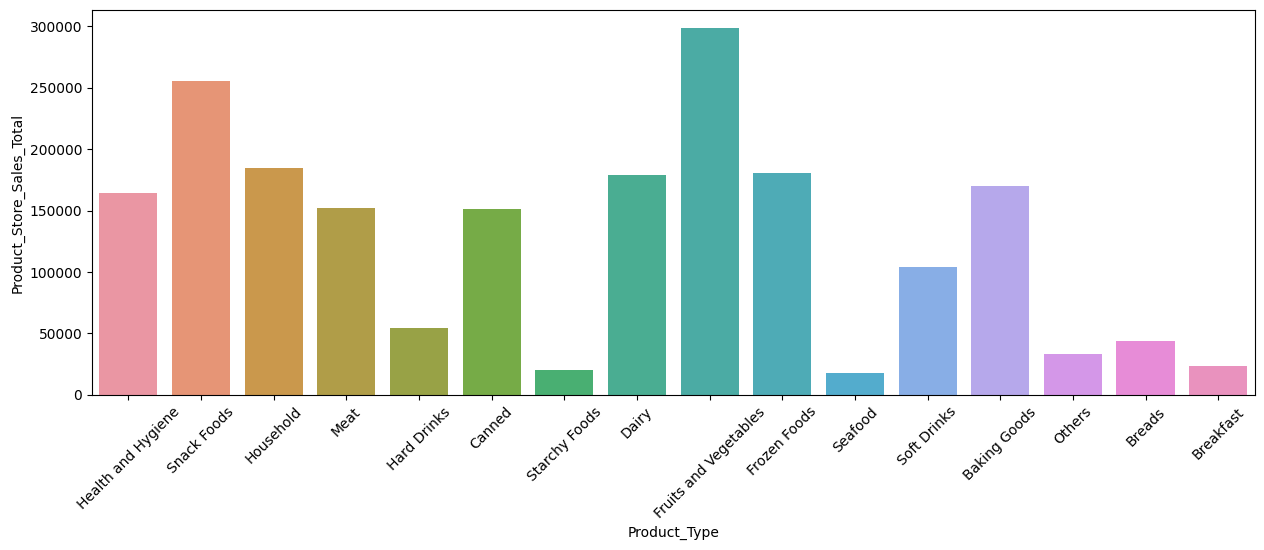

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Size']== 'Small'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

In [ ]:
df.groupby('Store_Location_City_Type')['Product_Store_Sales_Total'].sum()

Store_Location_City_Type
Tier 1     6673457.57
Tier 2    21650696.61
Tier 3     2030909.72
Name: Product_Store_Sales_Total, dtype: float64

<ipython-input-70-df42e48c2dbe>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Location_City_Type']== 'Tier 1'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Meat'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Canned'),
  Text(7, 0, 'Soft Drinks'),
  Text(8, 0, 'Baking Goods'),
  Text(9, 0, 'Starchy Foods'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'Breakfast'),
  Text(12, 0, 'Frozen Foods'),
  Text(13, 0, 'Seafood'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Hard Drinks')])

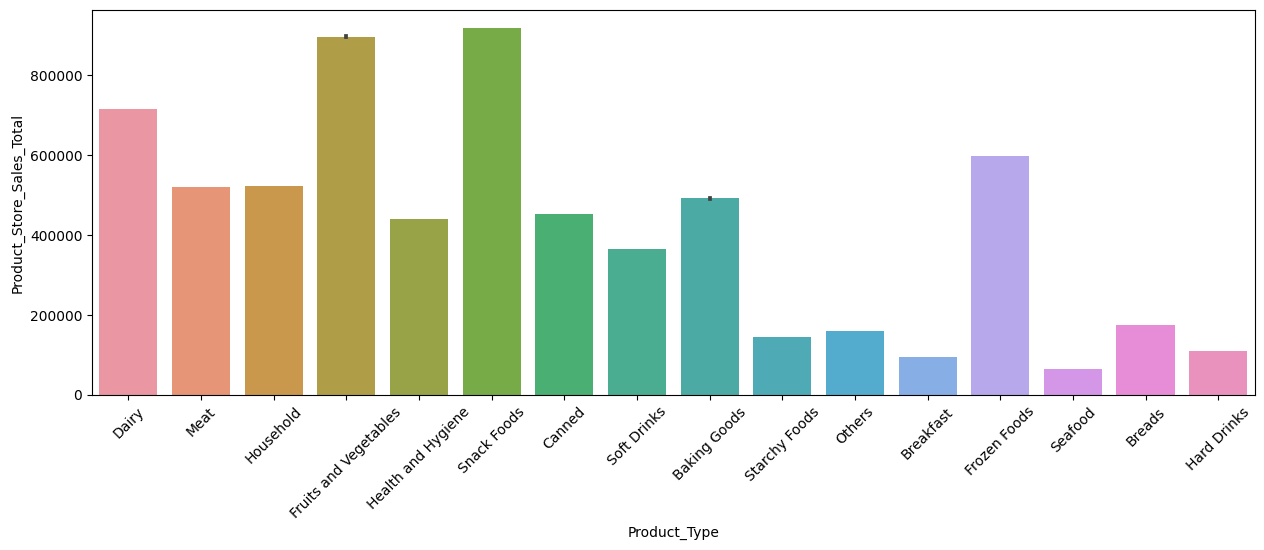

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Location_City_Type']== 'Tier 1'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-71-18fcead9d40e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Location_City_Type']== 'Tier 2'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Canned'),
  Text(2, 0, 'Baking Goods'),
  Text(3, 0, 'Snack Foods'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Hard Drinks'),
  Text(6, 0, 'Fruits and Vegetables'),
  Text(7, 0, 'Breads'),
  Text(8, 0, 'Household'),
  Text(9, 0, 'Dairy'),
  Text(10, 0, 'Soft Drinks'),
  Text(11, 0, 'Breakfast'),
  Text(12, 0, 'Meat'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

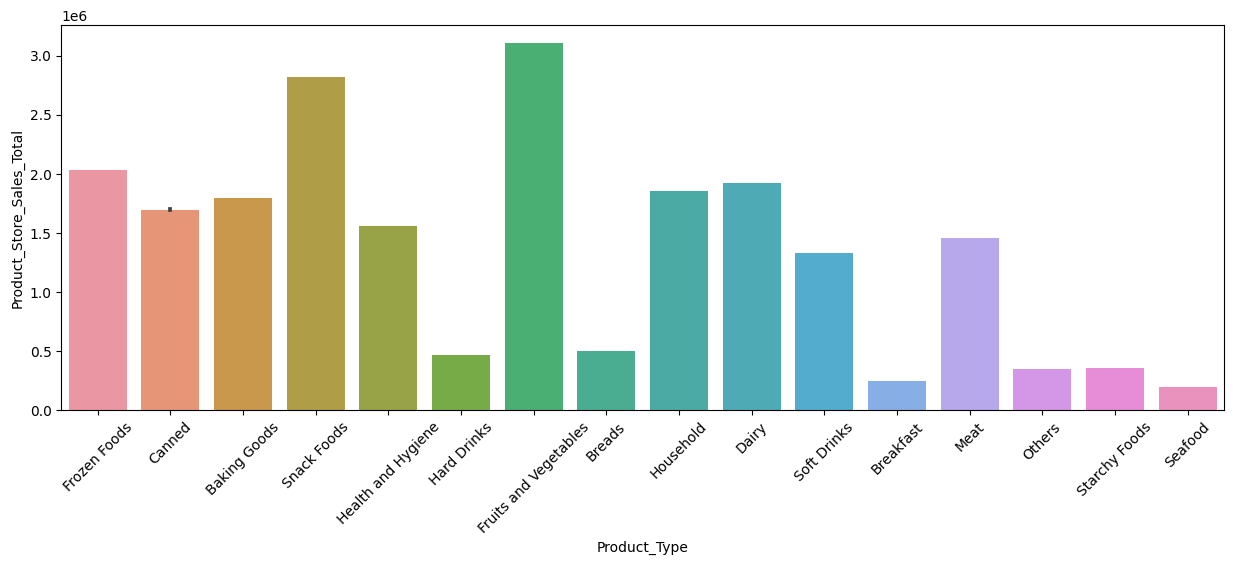

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Location_City_Type']== 'Tier 2'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-72-fad272d3f9c9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Location_City_Type']== 'Tier 3'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Health and Hygiene'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Meat'),
  Text(4, 0, 'Hard Drinks'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Starchy Foods'),
  Text(7, 0, 'Dairy'),
  Text(8, 0, 'Fruits and Vegetables'),
  Text(9, 0, 'Frozen Foods'),
  Text(10, 0, 'Seafood'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Baking Goods'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Breakfast')])

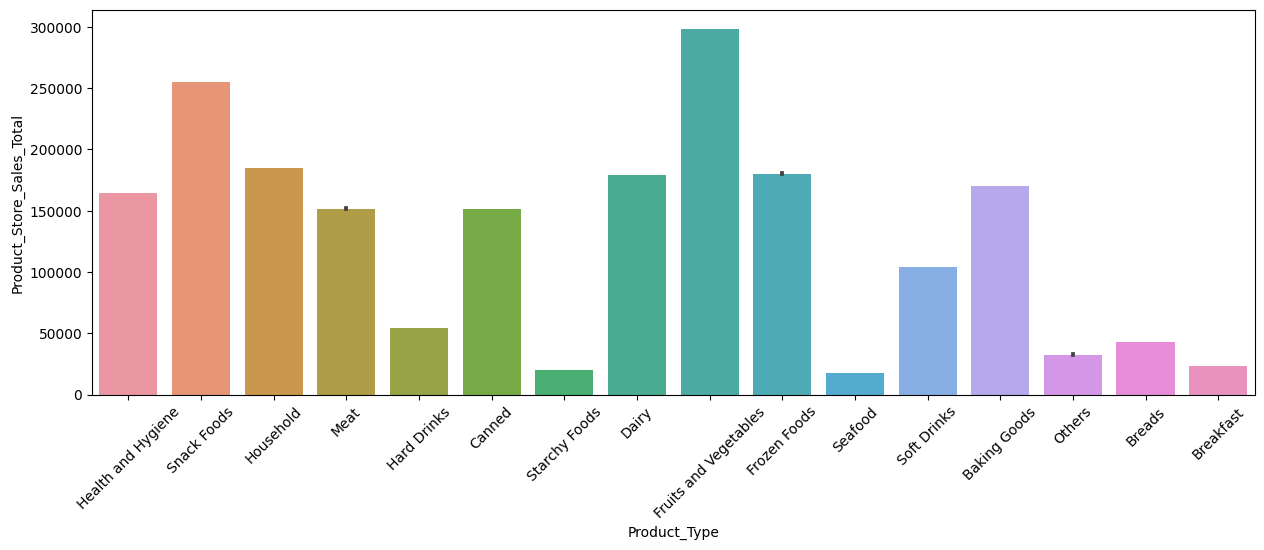

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Location_City_Type']== 'Tier 3'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

In [ ]:
df.head(3)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16


In [ ]:
df.groupby('Store_Type')['Product_Store_Sales_Total'].sum()

Store_Type
Departmental Store     6673457.57
Food Mart              2030909.72
Supermarket Type1      6223113.18
Supermarket Type2     15427583.43
Name: Product_Store_Sales_Total, dtype: float64

<ipython-input-75-e0508168171c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Type']== 'Departmental Store'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Meat'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Canned'),
  Text(7, 0, 'Soft Drinks'),
  Text(8, 0, 'Baking Goods'),
  Text(9, 0, 'Starchy Foods'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'Breakfast'),
  Text(12, 0, 'Frozen Foods'),
  Text(13, 0, 'Seafood'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Hard Drinks')])

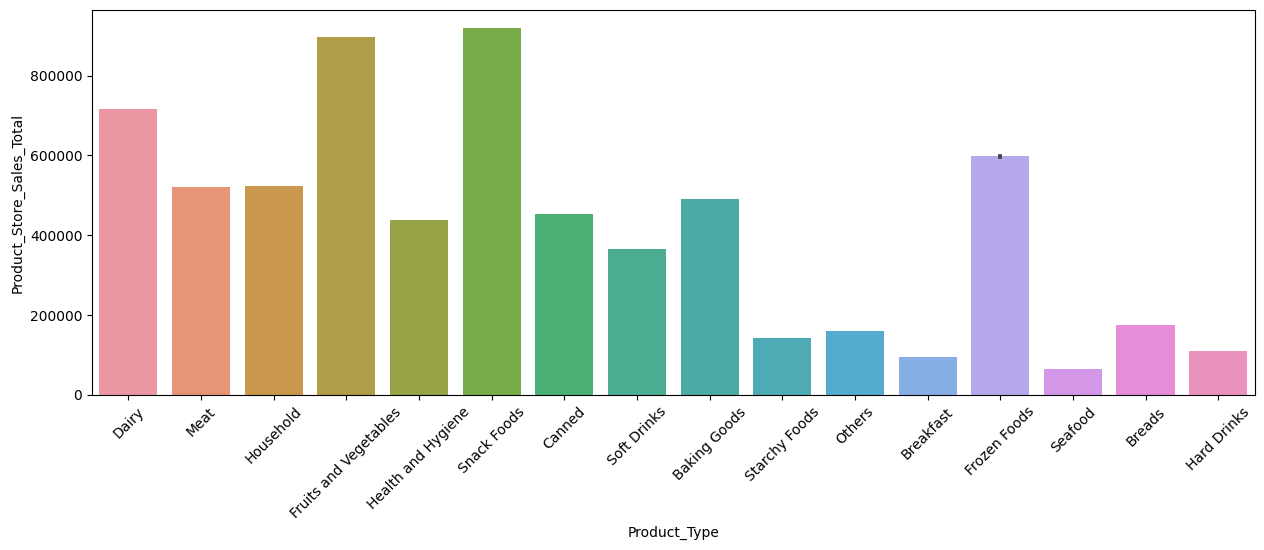

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Type']== 'Departmental Store'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-76-b5aaf668b8fd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Type']== 'Food Mart'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Health and Hygiene'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Meat'),
  Text(4, 0, 'Hard Drinks'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Starchy Foods'),
  Text(7, 0, 'Dairy'),
  Text(8, 0, 'Fruits and Vegetables'),
  Text(9, 0, 'Frozen Foods'),
  Text(10, 0, 'Seafood'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Baking Goods'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Breakfast')])

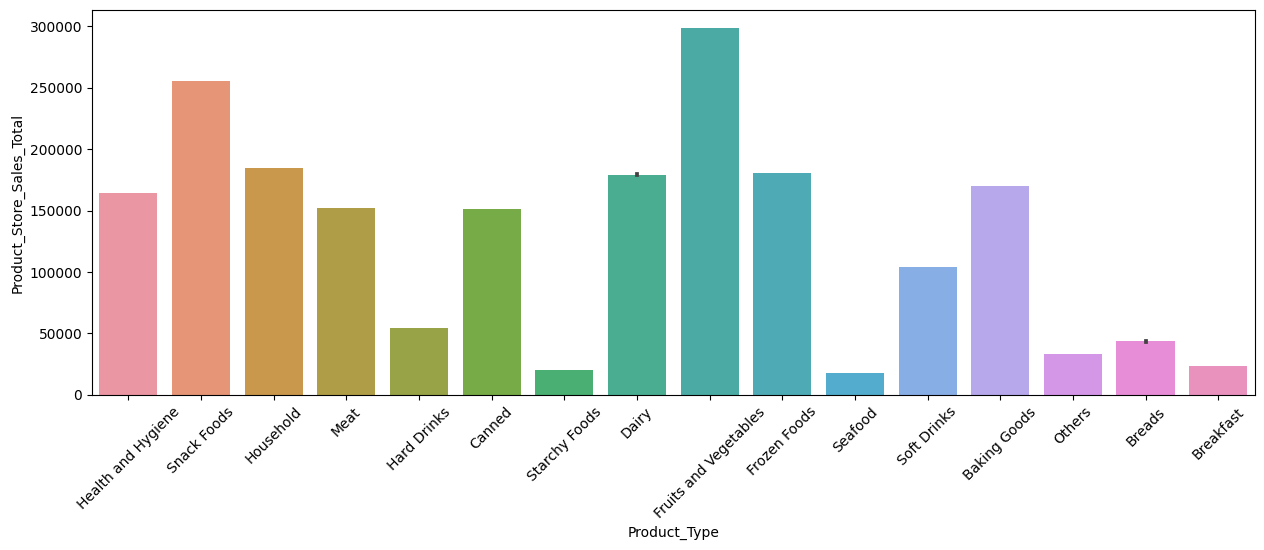

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Type']== 'Food Mart'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-77-6ab46fda1254>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Type']== 'Supermarket Type1'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Canned'),
  Text(1, 0, 'Baking Goods'),
  Text(2, 0, 'Snack Foods'),
  Text(3, 0, 'Soft Drinks'),
  Text(4, 0, 'Meat'),
  Text(5, 0, 'Breakfast'),
  Text(6, 0, 'Frozen Foods'),
  Text(7, 0, 'Fruits and Vegetables'),
  Text(8, 0, 'Dairy'),
  Text(9, 0, 'Hard Drinks'),
  Text(10, 0, 'Starchy Foods'),
  Text(11, 0, 'Health and Hygiene'),
  Text(12, 0, 'Household'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Seafood'),
  Text(15, 0, 'Breads')])

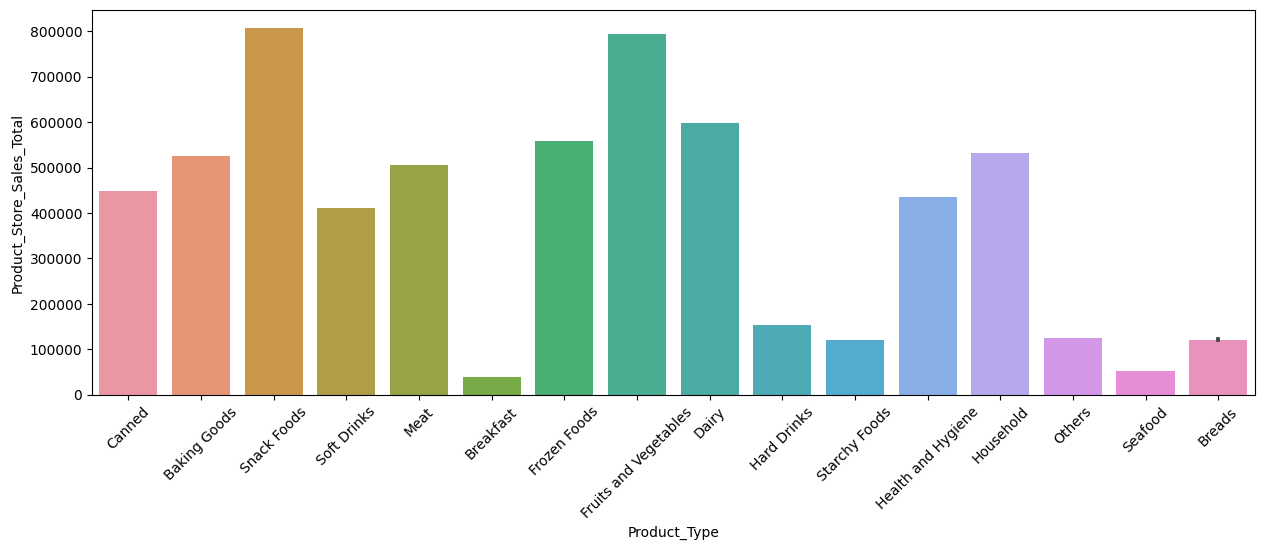

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Type']== 'Supermarket Type1'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

<ipython-input-78-317f14dd966e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data= df[df['Store_Type']== 'Supermarket Type2'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Health and Hygiene'),
  Text(3, 0, 'Hard Drinks'),
  Text(4, 0, 'Fruits and Vegetables'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Breads'),
  Text(8, 0, 'Household'),
  Text(9, 0, 'Dairy'),
  Text(10, 0, 'Breakfast'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Others'),
  Text(13, 0, 'Meat'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

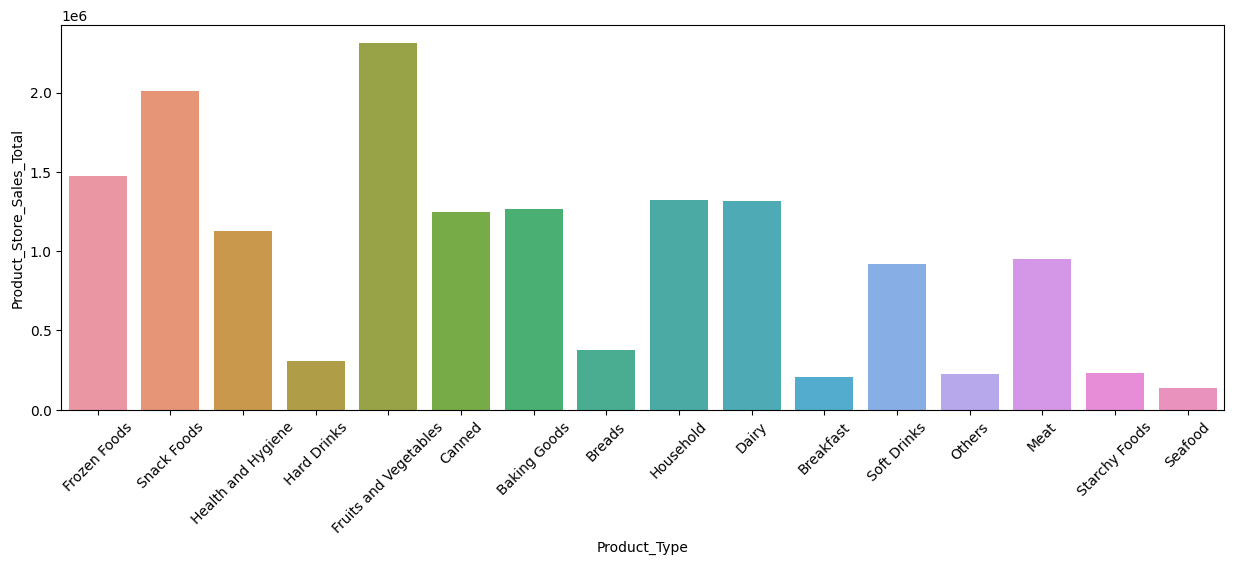

In [ ]:
plt.figure(figsize= (15, 5))
sns.barplot(data= df[df['Store_Type']== 'Supermarket Type2'], x= 'Product_Type', y= 'Product_Store_Sales_Total',estimator= np.sum, ci= 1.0)
plt.xticks(rotation= 45)

In [ ]:
pd.crosstab(df['Store_Id'], df['Product_Type'])

Product_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Store_Id,,,,,,,,,,,,,,,,
OUT001,136,30,10,119,150,142,199,38,114,134,130,31,13,202,106,32
OUT002,96,23,15,88,104,101,168,30,91,100,87,19,10,146,62,12
OUT003,99,34,19,90,145,122,182,23,89,107,106,32,13,186,74,28
OUT004,385,113,62,380,397,446,700,95,334,399,295,69,40,615,277,69


<Axes: xlabel='Product_Type', ylabel='Store_Id'>

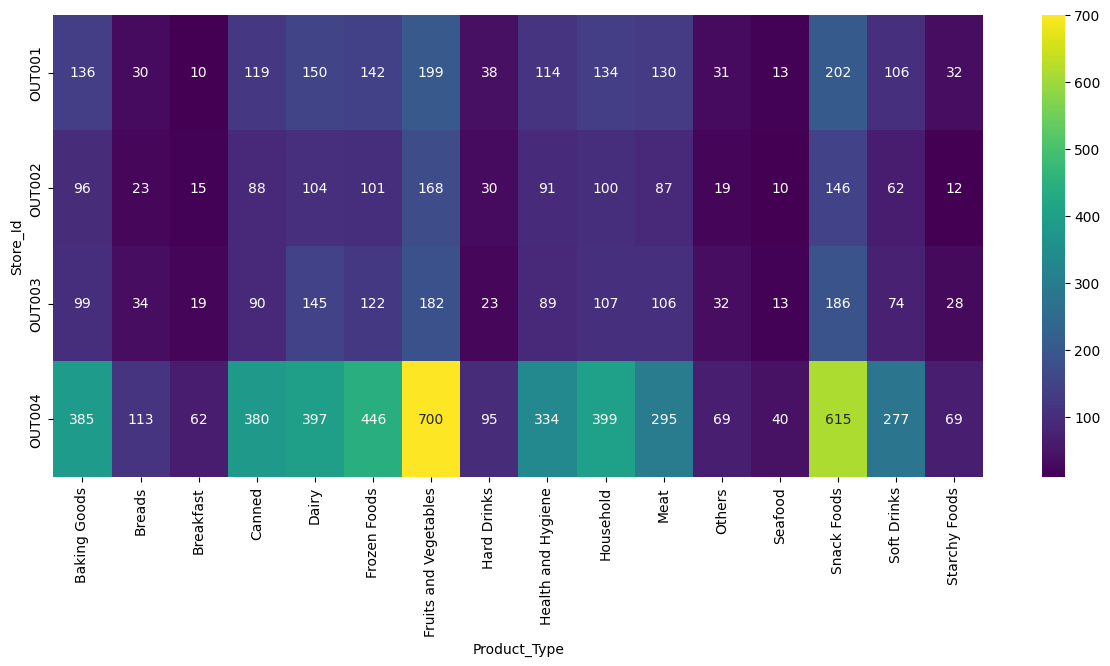

In [ ]:
plt.figure(figsize= (15, 6))
sns.heatmap(pd.crosstab(df['Store_Id'], df['Product_Type']), annot= True, cmap= 'viridis', fmt= 'g')

<Axes: xlabel='Product_Type', ylabel='Product_Sugar_Content'>

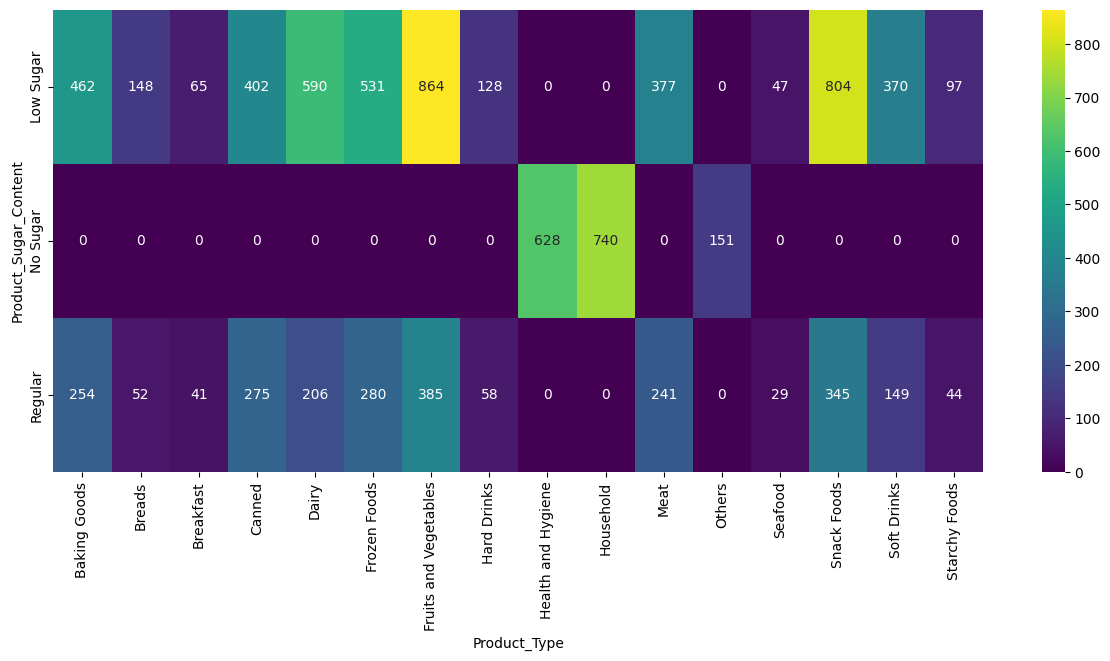

In [ ]:
plt.figure(figsize= (15, 6))
sns.heatmap(pd.crosstab(df['Product_Sugar_Content'], df['Product_Type']), annot= True, cmap= 'viridis', fmt= 'g')

<Axes: xlabel='Product_Type', ylabel='Store_Establishment_Year'>

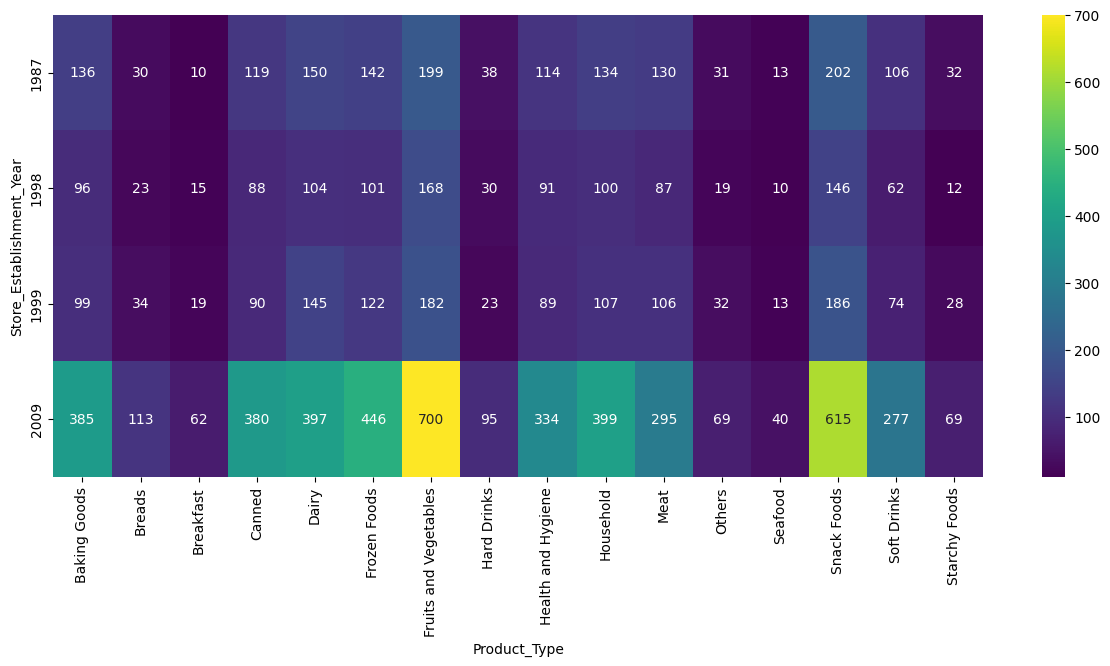

In [ ]:
plt.figure(figsize= (15, 6))
sns.heatmap(pd.crosstab(df['Store_Establishment_Year'], df['Product_Type']), annot= True, cmap= 'viridis', fmt= 'g')

<Axes: xlabel='Product_Type', ylabel='Store_Size'>

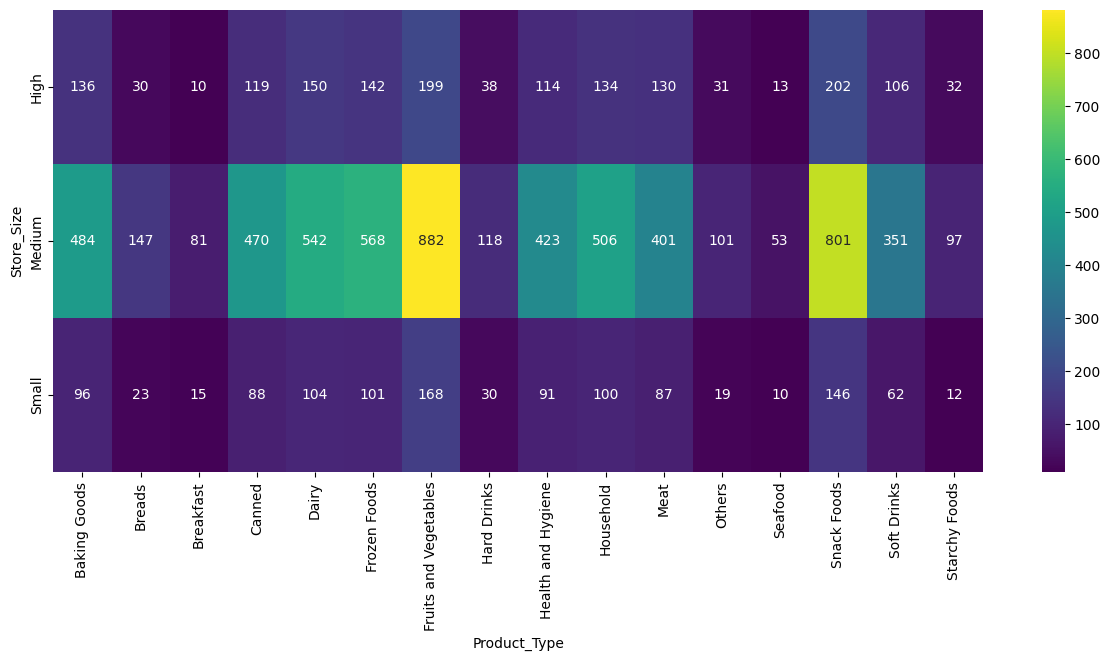

In [ ]:
plt.figure(figsize= (15, 6))
sns.heatmap(pd.crosstab(df['Store_Size'], df['Product_Type']), annot= True, cmap= 'viridis', fmt= 'g')

<Axes: xlabel='Product_Type', ylabel='Store_Location_City_Type'>

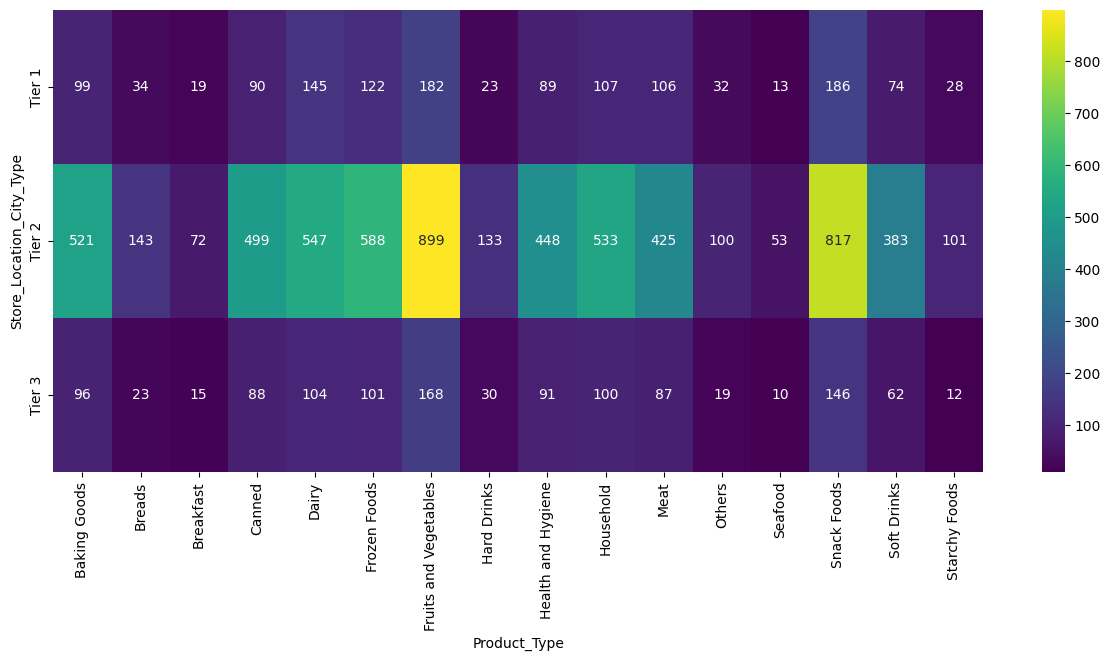

In [ ]:
plt.figure(figsize= (15, 6))
sns.heatmap(pd.crosstab(df['Store_Location_City_Type'], df['Product_Type']), annot= True, cmap= 'viridis', fmt= 'g')

<Axes: xlabel='Product_Type', ylabel='Store_Type'>

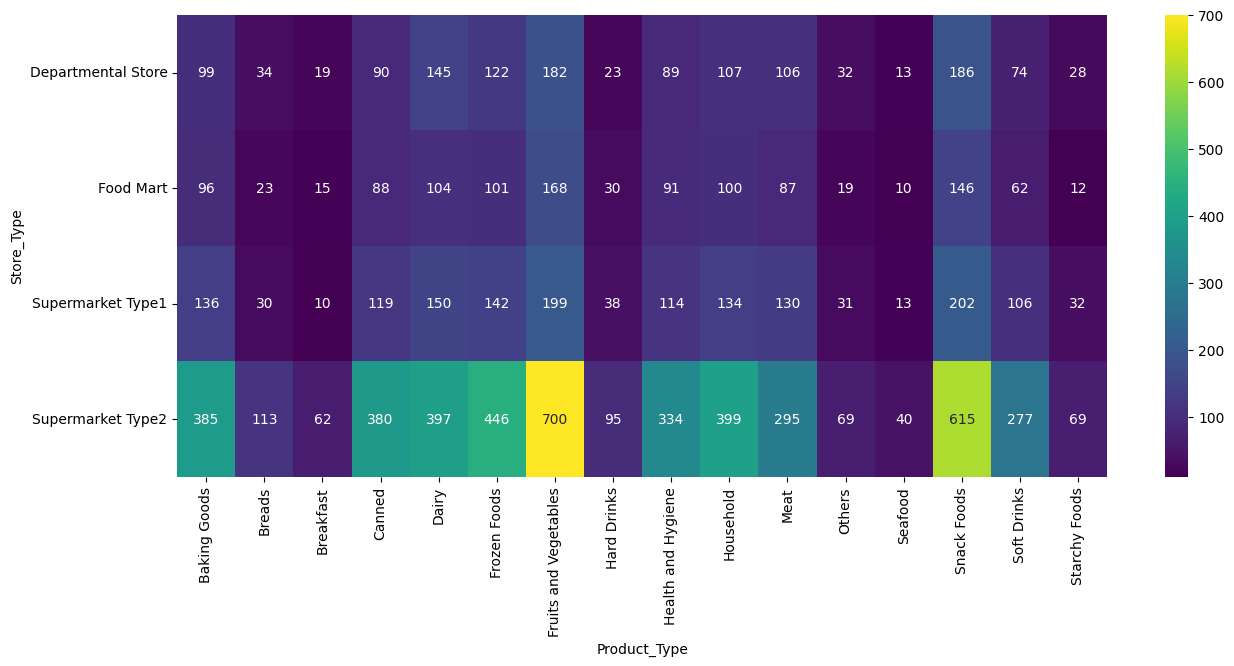

In [ ]:
plt.figure(figsize= (15, 6))
sns.heatmap(pd.crosstab(df['Store_Type'], df['Product_Type']), annot= True, cmap= 'viridis', fmt= 'g')

In [ ]:
df.head(1)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.4


In [ ]:
df['Store_Age']= 2023 - df['Store_Establishment_Year']

In [ ]:
df.drop(columns= ['Store_Establishment_Year'], axis= 0, inplace = True)

In [ ]:
df.head(3)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,14
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,24
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,High,Tier 2,Supermarket Type1,4130.16,36


In [ ]:
df['Product_Type'].value_counts().index.to_list()

['Fruits and Vegetables',
 'Snack Foods',
 'Frozen Foods',
 'Dairy',
 'Household',
 'Baking Goods',
 'Canned',
 'Health and Hygiene',
 'Meat',
 'Soft Drinks',
 'Breads',
 'Hard Drinks',
 'Others',
 'Starchy Foods',
 'Breakfast',
 'Seafood']

In [ ]:
Perishables= ['Fruits and Vegetables','Dairy','Meat','Breads','Seafood','Breakfast']

def product_type_perishable(x):
  if x in Perishables:
    return 'Pershable'
  else: return 'Non Perishable'

In [ ]:
df['product_Type_Categories']= df['Product_Type'].apply(product_type_perishable)

In [ ]:
df.head(1)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,product_Type_Categories
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.4,14,Non Perishable


In [ ]:
df['product_Type_Categories'].value_counts(1)

Non Perishable    0.652516
Pershable         0.347484
Name: product_Type_Categories, dtype: float64

In [ ]:
df.drop(columns= ['Product_Type'], axis= 0, inplace= True)

In [ ]:
df.head(3)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,product_Type_Categories
0,FD,12.66,Low Sugar,0.027,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,14,Non Perishable
1,FD,16.54,Low Sugar,0.144,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,24,Pershable
2,FD,14.28,Regular,0.031,162.08,OUT001,High,Tier 2,Supermarket Type1,4130.16,36,Non Perishable


In [ ]:
num_cols= df.select_dtypes(include= np.number).columns.to_list()
num_cols

['Product_Weight',
 'Product_Allocated_Area',
 'Product_MRP',
 'Product_Store_Sales_Total',
 'Store_Age']

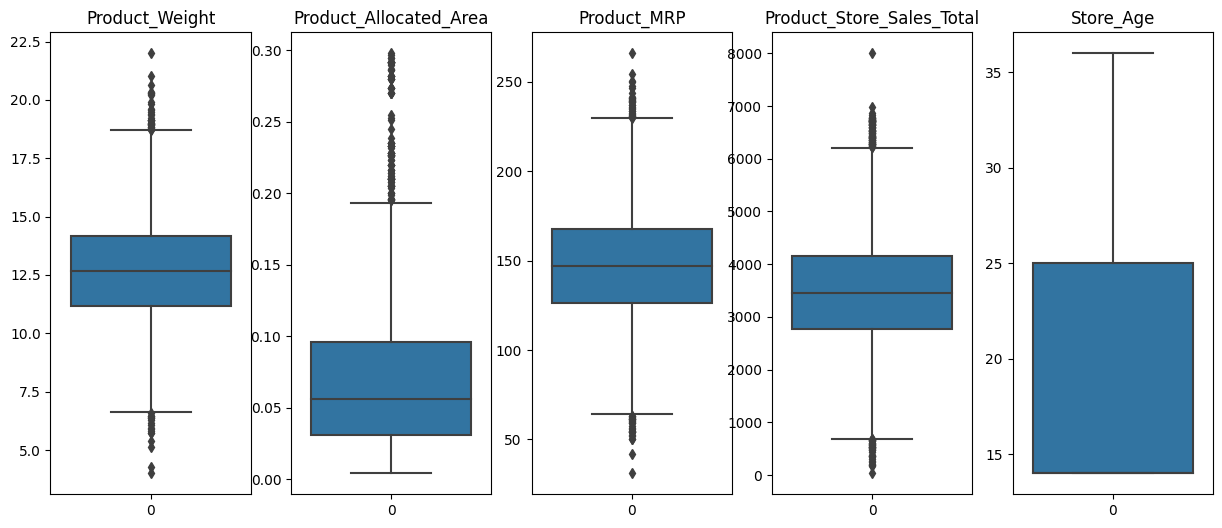

In [ ]:
fig, ax= plt.subplots(1,5, figsize= (15, 6) )

j= 0
for i in num_cols:
  sns.boxplot(df[i], ax= ax[j]).set(title= i)
  j+= 1

In [ ]:
# Perform OHE

df_OHE= pd.get_dummies(df,
               columns= df.select_dtypes(include= 'object').columns.to_list(),
               drop_first= True,
               )

In [ ]:
columns= df.select_dtypes(include= 'object').columns.to_list()

In [ ]:
x= df_OHE.drop('Product_Store_Sales_Total', axis= 1)
y= df_OHE['Product_Store_Sales_Total']

In [ ]:
x.shape

(8763, 19)

In [ ]:
y.shape

(8763,)

In [ ]:
import statsmodels.api as sm

In [ ]:
x= sm.add_constant(x)

In [ ]:
x.head(3)

,const,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Age,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,product_Type_Categories_Pershable
0,1.0,12.66,0.027,117.08,14,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
1,1.0,16.54,0.144,171.43,24,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,1.0,14.28,0.031,162.08,36,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= .3, random_state= 0)

In [ ]:
x_train.shape

(6134, 20)

In [ ]:
x_test.shape

(2629, 20)

In [ ]:
y_train.shape

(6134,)

In [ ]:
y_test.shape

(2629,)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x_train.head(3)

,const,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Age,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,product_Type_Categories_Pershable
8361,1.0,7.86,0.120,144.42,36,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2244,1.0,14.59,0.052,154.95,36,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5530,1.0,11.12,0.069,121.96,14,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0


# Test for multicolinearity

In [ ]:
variance_inflation_factor(x_train, 2)

1.0010677893450852

In [ ]:
VIF_df= pd.DataFrame()
VIF_df['Fearures']= x_train.columns

VIF_df['vif']= [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]

VIF_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Fearures,vif
0,const,0.000000
1,Product_Weight,1.790910
2,Product_Allocated_Area,1.001068
3,Product_MRP,1.932903
4,Store_Age,inf
5,Product_Id_FD,2.841545
6,Product_Id_NC,inf
7,Product_Sugar_Content_No Sugar,inf
8,Product_Sugar_Content_Regular,1.086384
9,Store_Id_OUT002,inf


In [ ]:
x_train.drop(columns= ['Store_Age'], axis= 0, inplace= True)
x_test.drop(columns= ['Store_Age'], axis= 0, inplace= True)

In [ ]:
VIF_df= pd.DataFrame()
VIF_df['Fearures']= x_train.columns

VIF_df['vif']= [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]

VIF_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Fearures,vif
0,const,0.000000
1,Product_Weight,1.790910
2,Product_Allocated_Area,1.001068
3,Product_MRP,1.932903
4,Product_Id_FD,2.841545
5,Product_Id_NC,inf
6,Product_Sugar_Content_No Sugar,inf
7,Product_Sugar_Content_Regular,1.086384
8,Store_Id_OUT002,inf
9,Store_Id_OUT003,inf


In [ ]:
x_train.head(2)

,const,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,product_Type_Categories_Pershable
8361,1.0,7.86,0.120,144.42,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2244,1.0,14.59,0.052,154.95,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
y_train.head(2)

8361    2316.49
2244    4053.82
Name: Product_Store_Sales_Total, dtype: float64

# Model Performance

In [ ]:
model= sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.821
Model:                                   OLS   Adj. R-squared:                  0.821
Method:                        Least Squares   F-statistic:                     2806.
Date:                       Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                               11:23:49   Log-Likelihood:                -46211.
No. Observations:                       6134   AIC:                         9.244e+04
Df Residuals:                           6123   BIC:                         9.252e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -9.2899     34.214     -0.272      0.786     -76.361      57.781
Product_Weight                      136.6200      3.472     39.348      0.000     129.813     143.426
Product_Allocated_Area               57.1761    119.905      0.477      0.633    -177.879     292.231
Product_MRP                          13.1178      0.262     49.976      0.000      12.603      13.632
Product_Id_FD                       -24.2278     22.464     -1.079      0.281     -68.264      19.809
Product_Id_NC                        11.3760     12.569      0.905      0.365     -13.265      36.016
Product_Sugar_Content_No Sugar       11.3760     12.569      0.905      0.365     -13.265      36.016
Product_Sugar_Content_Regular        23.1491     13.552      1.708      0.088      -3.418      49.717
Store_Id_OUT002                    -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Id_OUT003                     331.9870     19.997     16.602      0.000     292.787     371.188
Store_Id_OUT004                    -162.7939      5.244    -31.046      0.000    -173.073    -152.515
Store_Size_Medium                   169.1931     16.695     10.135      0.000     136.466     201.920
Store_Size_Small                   -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Location_City_Type_Tier 2     -92.4400     13.451     -6.872      0.000    -118.809     -66.071
Store_Location_City_Type_Tier 3    -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Type_Food Mart               -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Type_Supermarket Type1         70.3539     16.609      4.236      0.000      37.794     102.914
Store_Type_Supermarket Type2       -162.7939      5.244    -31.046      0.000    -173.073    -152.515
product_Type_Categories_Pershable    26.8072     13.404      2.000      0.046       0.530      53.085
==============================================================================
Omnibus:                     1947.557   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49023.766
Skew:                           0.952   Prob(JB):                         0.00
Kurtosis:                      16.718   Cond. No.                     4.28e+36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.61e-66. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
y_hat= model.predict(x_train)
y_hat

8361    2919.564098
2244    3973.259124
5530    2840.654609
322     3097.853136
4688    3398.754966
           ...     
4373    3988.782489
7891    3696.687777
4859    1541.653741
3264    4036.321376
2732    3269.799983
Length: 6134, dtype: float64

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
r2_score(y_train, y_hat)

0.8208895053824232

In [ ]:
mean_squared_error(y_train, y_hat)

204716.9688103638

In [ ]:
def model_evaluation(model, x, y):
  y_hat= model.predict(x)

  rmse= np.sqrt(mean_squared_error(y,y_hat))
  mae= mean_absolute_error(y, y_hat)
  mape=mean_absolute_percentage_error(y, y_hat)
  r2= r2_score(y, y_hat)

  return pd.DataFrame({'RMSE': [rmse], 'MAE': [mae], 'MAPE': [mape], 'R2': [r2]})

In [ ]:
model_evaluation(model, x_train, y_train)

,RMSE,MAE,MAPE,R2
0,452.456593,262.597661,0.100454,0.82089


In [ ]:
model_evaluation(model, x_test, y_test)

,RMSE,MAE,MAPE,R2
0,432.787951,252.636159,0.096217,0.832444


# Check the Residual Mean

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.821
Model:                                   OLS   Adj. R-squared:                  0.821
Method:                        Least Squares   F-statistic:                     2806.
Date:                       Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                               11:23:50   Log-Likelihood:                -46211.
No. Observations:                       6134   AIC:                         9.244e+04
Df Residuals:                           6123   BIC:                         9.252e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -9.2899     34.214     -0.272      0.786     -76.361      57.781
Product_Weight                      136.6200      3.472     39.348      0.000     129.813     143.426
Product_Allocated_Area               57.1761    119.905      0.477      0.633    -177.879     292.231
Product_MRP                          13.1178      0.262     49.976      0.000      12.603      13.632
Product_Id_FD                       -24.2278     22.464     -1.079      0.281     -68.264      19.809
Product_Id_NC                        11.3760     12.569      0.905      0.365     -13.265      36.016
Product_Sugar_Content_No Sugar       11.3760     12.569      0.905      0.365     -13.265      36.016
Product_Sugar_Content_Regular        23.1491     13.552      1.708      0.088      -3.418      49.717
Store_Id_OUT002                    -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Id_OUT003                     331.9870     19.997     16.602      0.000     292.787     371.188
Store_Id_OUT004                    -162.7939      5.244    -31.046      0.000    -173.073    -152.515
Store_Size_Medium                   169.1931     16.695     10.135      0.000     136.466     201.920
Store_Size_Small                   -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Location_City_Type_Tier 2     -92.4400     13.451     -6.872      0.000    -118.809     -66.071
Store_Location_City_Type_Tier 3    -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Type_Food Mart               -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Type_Supermarket Type1         70.3539     16.609      4.236      0.000      37.794     102.914
Store_Type_Supermarket Type2       -162.7939      5.244    -31.046      0.000    -173.073    -152.515
product_Type_Categories_Pershable    26.8072     13.404      2.000      0.046       0.530      53.085
==============================================================================
Omnibus:                     1947.557   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49023.766
Skew:                           0.952   Prob(JB):                         0.00
Kurtosis:                      16.718   Cond. No.                     4.28e+36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.61e-66. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
model.resid # y_train - model.predict(x_train)

8361   -603.074098
2244     80.560876
5530   -247.704609
322     -91.443136
4688     39.545034
           ...    
4373     44.797511
7891    248.902223
4859    122.286259
3264     82.168624
2732     -7.059983
Length: 6134, dtype: float64

In [ ]:
# mean

np.mean(model.resid)

2.7287806474452187e-12

# Checking Homoscedasticity

Text(0.5, 1.0, 'Residuals vs Fitted Values')

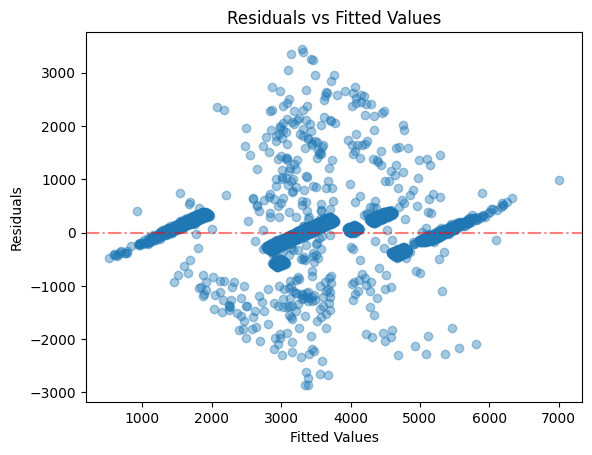

In [ ]:
# model.resid
# model.fittedvalues = model.predict

plt.scatter(model.fittedvalues, model.resid, alpha= 0.4)
plt.axhline(0, color= 'r', alpha= 0.5, linestyle= '-.')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

In [ ]:
import statsmodels.stats.api as sms

In [ ]:
results= sms.het_goldfeldquandt(y_train, x_train)
results

(0.903001831057537, 0.9975938945640488, 'increasing')

In [ ]:
results[1] # 0.05 : significance level

0.9975938945640488

Observation
Null hypothesis has passed. The p-value is well above 0.05

# Check the Linearity of the Variables

In [ ]:
# Residual vs Fitted values Scatter plot

# Normality of Error

<Axes: ylabel='Count'>

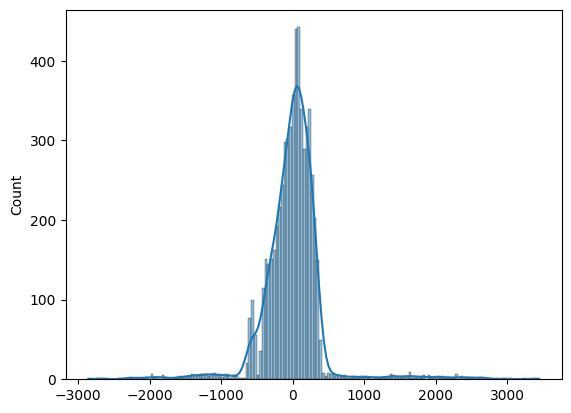

In [ ]:
sns.histplot(model.resid, kde= True)

In [ ]:
import pylab
from scipy import stats

((array([-3.68803911, -3.45585563, -3.3280438 , ...,  3.3280438 ,
          3.45585563,  3.68803911]),
  array([-2858.79890544, -2855.22538302, -2720.42581562, ...,
          3349.7209442 ,  3381.1126455 ,  3445.79253939])),
 (395.06359610717976, 2.6553770416903878e-12, 0.8726675013810739))

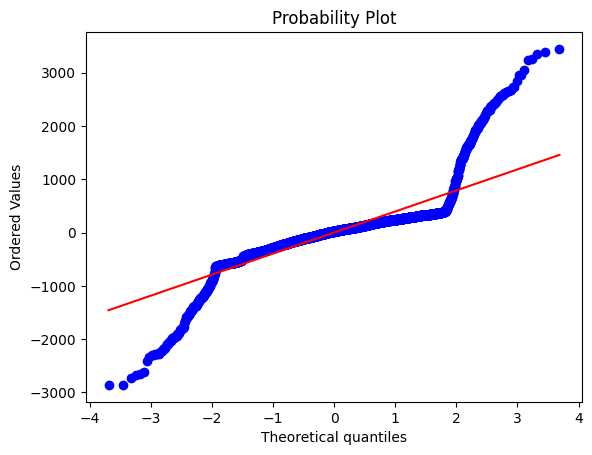

In [ ]:
stats.probplot(model.resid, dist= 'norm',plot= pylab)

# Observation
The residual is well normally distrubed

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
model2= LinearRegression()

mae_= cross_val_score(model2, x_train, y_train, cv= 10,scoring='neg_mean_absolute_percentage_error')

In [ ]:
np.mean(-mae_)

0.10079422025575147

In [ ]:
(np.mean(-mae_) - 3 * np.std(mae_), np.mean(-mae_) + 3 * np.std(mae_))

(0.0690220213207487, 0.13256641919075424)

# Observation
99.7% of the error is between 7% amd 13%

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, x_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, x_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.820 (+/- 0.055)
Mean Squared Error: 205816.671 (+/- 75555.209)


# Observation
After applying cross-validation the model score has improved. We can compare it by the evaluation metric scores.

# Actionable Insights and Business Recommendations
- We can use this prediction model to predict the total sales that will be done by SuperKart in the next quarter.

- The model explains around 79% of the variation in the data.

- OUT004 - OUT004, which is of Supermarket Type2, located in a Tier 2 city and having store size as medium, is performing well. They can also look to set up stores in this type of city having comparable socio-economic conditions in order to expand their business and reach.

- OUT002 - OUT002, being a food mart in a Tier 3 city and having small store size, is also performing well. Target similar cities for business expansion.

- OUT001 - OUT001 which is a store of Supermarket Type 1, located in a Tier 2 city and having store size as high is not performing upto the mark. SuperKart can look to look build new marketing strategies (maybe give attractive discounts and offers) in this store in order to attract more customers.

- OUT003 - Similar approach can be taken to increase the business of OUT003 which is a Departmental store in a Tier 1 city and having store size as medium. It is the premium store of the company where most of the costly goods are sold, so the correct set of audience should be targetted.

- Daily needs like fruits and vegetables and snack foods are the biggest contributors to the revenue across all the stores. So SuperKart should look to maintain the inventory of these products properly and ensure that these products never face a shortage.

**Additional information that can be collected to gain better insights -**

- Customers' details like age and gender can be incorporated in this model so that the company gets to know their target audience well and can build their sales strategies according to that.

- The company should also keep a watch for the number of festive occasions present in a quarter so that they can strategize their inventory accordingly.

**Continued Research Recommendations and Considerations**

- What are OUT004 and OUT002 doing to drive revenue?
- Who are their customers and what are thier behaviors?
- What aren't the pther two perfoming as well?
- Who are their customers and what are thier behaviors?
- How large does socio economics play into the role of how these stores perform?
- do these stores carry different brands of products and does that play a part into revenue generation?
